# <font color="#114b98">Anticipez les besoins en consommation de bâtiments</font>

## <font color="#114b98">Notebook d'analyse exploratoire</font>

Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, notre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.

Des relevés minutieux ont été effectués par les agents de la ville en 2016. Ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, nous voulons tenter de prédire **les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation** pour lesquels elles n’ont pas encore été mesurées.

Nous cherchons également à **évaluer l’intérêt de l’"ENERGY STAR Score" pour la prédiction d’émissions**, qui est fastidieux à calculer avec l’approche utilisée actuellement par notre équipe. Nous l'intégrerons dans la modélisation et jugerons de son intérêt.

Voici un récapitulatif de notre mission :
 - Réaliser une courte analyse exploratoire.
 - Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

## <font color="#114b98">Sommaire</font>
[1. Chargement du dataset](#section_1)

[2. Sélection et premiers traitements des paramètres](#section_2)  

[3. Traitement détaillé des variables de type 'int64'](#section_3)  

[4. Traitement détaillé des variables de type 'float64'](#section_4)  

[5. Traitement détaillé des variables de type 'object'](#section_5)  

[6. Analyse univariée](#section_6)   

[7. Analyse multivariée](#section_7)   

[8. Feature Engineering](#section_8)   

## <font color="#114b98" id="section_1">1. Chargement du dataset</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
path = 'N:/5 - WORK/1 - Projets/Projet 3/'
files = os.listdir(path)
files

['2016_Building_Energy_Benchmarking.csv',
 'Anticipez_les_besoins_en_consommation_de_bâtiments_Durand_Simon.zip',
 'data_seattle_clean.csv',
 'Durand_Simon_4_presentation_102022.pdf',
 'images',
 'ressources',
 'tutorats']

In [3]:
filename = files[0]
filename

'2016_Building_Energy_Benchmarking.csv'

In [4]:
%%time
data = pd.read_csv(path+filename, sep=',', low_memory=False)

CPU times: total: 15.6 ms
Wall time: 22 ms


In [5]:
print("Le dataset compte {} lignes et {} colonnes.".format(data.shape[0], data.shape[1]))
print('Données manquantes (%): ', data.isna().sum().sum()/(data.shape[0]*data.shape[1])*100)

Le dataset compte 3376 lignes et 46 colonnes.
Données manquantes (%):  12.847723057902327


In [6]:
pd.set_option('display.max_column', 46)

In [7]:
plt.rc('axes', titlesize=22) 
plt.rc('axes', labelsize=18) 

J'observe maintenant les premières lignes de ce dataset.

In [8]:
data.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

Je regarde si le jeu de données contient des valeurs dupliquées.

In [9]:
data.OSEBuildingID.duplicated().sum()

0

In [10]:
data.PropertyName.duplicated().sum()

14

In [11]:
data[((data['PropertyName'].duplicated()) & (data['Address'].duplicated()))]

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, Comments, ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

In [12]:
#data[((data['TaxParcelIdentificationNumber'].duplicated()) & (data['Address'].duplicated()))]

Il n'y a pas de doublons dans ce jeu de données.

In [13]:
data.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     3376.000000      3.376000e+03         3376.000000   
mean         4.709123      9.483354e+04         8001.526066   
std          5.494465      2.188376e+05        32326.723928   
min          0.000000      1.128500e+04            0.000000   
25%          2.000000      2.848700e+04            0.000000   
50%          4.000000      4.417500e+04            0.000000   
75%          5.000000      9.099200e+04            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            3.376000e+03               3.356000e+03   
mean             8.683201e+04               7.917764e+04   
std              2.079398e+05               2.017034e+05   
min              3.636000e+03               5.656000e+03   
25%              2.775600e+04               2.509475e+04   
50%              4.321600e+04               3.989400e+04   
75%              8.427625e+04               7.620025e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1679.000000                      596.000000   
mean                      28444.075817                    11738.675166   
std                       54392.917928                    29331.199286   
min                           0.000000                        0.000000   
25%                        5000.000000                     2239.000000   
50%                       10664.000000                     5043.000000   
75%                       26640.000000                    10138.750000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2533.000000       3369.000000         3370.000000   
mean         67.918674         54.732116           57.033798   
std          26.873271         56.273124           57.163330   
min           1.000000          0.000000            0.000000   
25%          53.000000         27.900000           29.400000   
50%          75.000000         38.599998           40.900002   
75%          90.000000         60.400002           64.275002   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3367.000000           3367.000000         3.371000e+03   
mean           134.232848            137.783932         5.403667e+06   
std            139.287554            139.109807         2.161063e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             74.699997             78.400002         9.251286e+05

## <font color="#114b98" id="section_2">2. Sélection et premiers traitements des paramètres</font>

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

Je décide de supprimer les paramètres qui ont un pourcentage de données manquantes trop important.

In [15]:
temp = (100-(data.isnull().sum() / data.shape[0])*100).round(2).reset_index()
temp.columns = ['Paramètre','Pourcentage de valeurs présentes']
temp = temp.sort_values("Pourcentage de valeurs présentes", ascending=True) 
temp.head(10)

Paramètre  Pourcentage de valeurs présentes
41                         Comments                              0.00
43                          Outlier                              0.95
27         YearsENERGYSTARCertified                              3.52
25      ThirdLargestPropertyUseType                             17.65
26   ThirdLargestPropertyUseTypeGFA                             17.65
23     SecondLargestPropertyUseType                             49.73
24  SecondLargestPropertyUseTypeGFA                             49.73
28                  ENERGYSTARScore                             75.03
22        LargestPropertyUseTypeGFA                             99.41
21           LargestPropertyUseType                             99.41

J'enlève cependant du dataset les observations catégorisées comme 'Outlier'.

In [16]:
data['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [17]:
(data['Outlier']=='Low outlier').sum()

23

In [18]:
(data['Outlier']=='High outlier').sum()

9

In [19]:
mask_index = data[(data['Outlier']=='Low outlier') | (data['Outlier']=='High outlier')].index

In [20]:
data.drop(mask_index, inplace = True, axis = 0)

In [21]:
data.drop(['Comments','Outlier','YearsENERGYSTARCertified'],
          axis = 1, 
          inplace = True)

Je supprime également les paramètres qui ne sont pas pertinents pour ce projet.

In [22]:
data.drop(['State','TaxParcelIdentificationNumber','CouncilDistrictCode', 'OSEBuildingID', 'DefaultData'],
          axis = 1, 
          inplace = True)

Certaines colonnes sont redondantes :
 - SiteEUI(kBtu/sf)                 
 - SiteEUIWN(kBtu/sf)              
 - SourceEUI(kBtu/sf)               
 - SourceEUIWN(kBtu/sf)             
 - SiteEnergyUse(kBtu)              
 - SiteEnergyUseWN(kBtu)                            
 - Electricity(kWh)                
 - Electricity(kBtu)               
 - NaturalGas(therms)              
 - NaturalGas(kBtu)                 

Je supprime les variables surfaciques que je décide de ne pas utiliser.

In [23]:
data.drop(['SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)'],
          axis = 1, 
          inplace = True)

Je supprime 'SiteEnergyUse(kBtu)' afin de garder la variable normalisée par la météo 'WN' ("Weather Normalized").

In [24]:
data.drop(['SiteEnergyUse(kBtu)'],
          axis = 1, 
          inplace = True)

En ce qui concerne l'électricité et le gaz naturel, je vais concerver les mesures en kBtu afin de conserver les mêmes unités, voir les mêmes ordres de grandeur, que pour les autres valeurs énergétiques.

Pour information , le B.T.U. (British Thermal Unit) est une unité de mesure d'énergie thermique. 
Elle est utilisé dans les pays anglo-saxons et équivaut à 1055,06 Joule.
1 BTU est l’énergie nécessaire pour chauffer une livre d’eau de 1 degré Fahrenheit au niveau de la mer.

In [25]:
data.drop(['Electricity(kWh)','NaturalGas(therms)'],
          axis = 1, 
          inplace = True)

Le paramètre 'City' ne prend qu'une seule valeur ('Seattle') et c'est aussi le cas du paramètre 'DateYear' (2016). 

In [26]:
data['City'].unique()

array(['Seattle'], dtype=object)

In [27]:
data['DataYear'].unique()

array([2016], dtype=int64)

Je supprime donc ces paramètres.

In [28]:
data.drop(['City', 'DataYear'], axis = 1, inplace = True)

Dans le paramètre 'BuildingType', je supprime les observations comportant 'Multifamily' car le sujet porte sur bâtiments non destinés à l'habitation.

In [29]:
data['BuildingType'].value_counts()

NonResidential          1445
Multifamily LR (1-4)    1006
Multifamily MR (5-9)     578
Multifamily HR (10+)     109
SPS-District K-12         97
Nonresidential COS        84
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [30]:
data = data[~data['BuildingType'].str.contains("Multifamily")]

In [31]:
data.loc[data['BuildingType'] == 'SPS-District K-12','BuildingType'] = 'Education'
data.loc[data['BuildingType'] == 'Campus','BuildingType'] = 'Education'

In [32]:
data[data['BuildingType'] == 'Nonresidential WA']

BuildingType PrimaryPropertyType  PropertyName  \
3359  Nonresidential WA          University  Burke Museum   

                   Address  ZipCode Neighborhood  Latitude  Longitude  \
3359  4331 Memorial Way NE  98195.0    NORTHEAST  47.66127 -122.31256   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
3359       1962                1.0               1             68072   

      PropertyGFAParking  PropertyGFABuilding(s) ListOfAllPropertyUseTypes  \
3359                   0                   68072        College/University   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3359     College/University                    68916.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
3359                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
3359                         NaN                             NaN   

      ENERGYSTARScore  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
3359              NaN             3180819.25             0.0   

      Electricity(kBtu)  NaturalGas(kBtu) ComplianceStatus  TotalGHGEmissions  \
3359          3180819.0               0.0        Compliant              22.17   

      GHGEmissionsIntensity  
3359                   0.33

In [33]:
data.loc[data['BuildingType'] == 'Nonresidential WA','BuildingType'] = 'Education'

In [34]:
data.loc[data['BuildingType'] == 'Nonresidential COS','BuildingType'] = 'NonResidential'

In [35]:
data['BuildingType'].value_counts()

NonResidential    1529
Education          122
Name: BuildingType, dtype: int64

Je supprime aussi les observations pour lesquelles le paramètre 'LargestPropertyUseType' est 'Multifamily Housing'.

In [36]:
#data[data['LargestPropertyUseType'] == 'Multifamily Housing']

In [37]:
mask_index = data[data['LargestPropertyUseType'] == 'Multifamily Housing'].index

In [38]:
data.drop(mask_index, inplace = True, axis = 0)

Je regarde aussi si le jeu de données comporte des valeurs négatives.

In [39]:
((data.select_dtypes(include=['int64']))<0).sum()

YearBuilt                 0
NumberofFloors            0
PropertyGFATotal          0
PropertyGFAParking        0
PropertyGFABuilding(s)    0
dtype: int64

In [40]:
((data.select_dtypes(include=['float64']))<0).sum()

ZipCode                               0
Latitude                              0
Longitude                          1640
NumberofBuildings                     0
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseTypeGFA        0
ENERGYSTARScore                       0
SiteEnergyUseWN(kBtu)                 0
SteamUse(kBtu)                        0
Electricity(kBtu)                     1
NaturalGas(kBtu)                      0
TotalGHGEmissions                     1
GHGEmissionsIntensity                 1
dtype: int64

Les valeurs négatives pour les longitudes sont logiques.

Ce n'est pas le cas pour les variables Electricity(kBtu), TotalGHGEmissions et GHGEmissionsIntensity.

In [41]:
data[data['Electricity(kBtu)']<0]

BuildingType          PrimaryPropertyType    PropertyName  \
3206  NonResidential  Small- and Mid-Sized Office  Bullitt Center   

                  Address  ZipCode Neighborhood  Latitude  Longitude  \
3206  1501 E. Madison St.  98122.0      CENTRAL  47.61432 -122.31257   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
3206       2013                1.0               6             52000   

      PropertyGFAParking  PropertyGFABuilding(s) ListOfAllPropertyUseTypes  \
3206                   0                   52000                    Office   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3206                 Office                    48159.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
3206                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
3206                         NaN                             NaN   

      ENERGYSTARScore  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
3206            100.0            240132.0938             0.0   

      Electricity(kBtu)  NaturalGas(kBtu) ComplianceStatus  TotalGHGEmissions  \
3206          -115417.0               0.0        Compliant               -0.8   

      GHGEmissionsIntensity  
3206                  -0.02

Comme les trois valeurs négatives sont pour la même observation, je décide de la supprimer au lieu de remplacer par np.nan.

In [42]:
data.drop(3206, axis = 0, inplace = True)

In [43]:
((data.select_dtypes(include=['float64']))<0).sum()

ZipCode                               0
Latitude                              0
Longitude                          1639
NumberofBuildings                     0
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseTypeGFA        0
ENERGYSTARScore                       0
SiteEnergyUseWN(kBtu)                 0
SteamUse(kBtu)                        0
Electricity(kBtu)                     0
NaturalGas(kBtu)                      0
TotalGHGEmissions                     0
GHGEmissionsIntensity                 0
dtype: int64

Je décide d'analyser maintenant en détails les différentes variables par type.

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1639 entries, 0 to 3375
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1639 non-null   object 
 1   PrimaryPropertyType              1639 non-null   object 
 2   PropertyName                     1639 non-null   object 
 3   Address                          1639 non-null   object 
 4   ZipCode                          1623 non-null   float64
 5   Neighborhood                     1639 non-null   object 
 6   Latitude                         1639 non-null   float64
 7   Longitude                        1639 non-null   float64
 8   YearBuilt                        1639 non-null   int64  
 9   NumberofBuildings                1637 non-null   float64
 10  NumberofFloors                   1639 non-null   int64  
 11  PropertyGFATotal                 1639 non-null   int64  
 12  PropertyGFAParking  

## <font color="#114b98" id="section_3">3. Traitement détaillé des variables de type 'int64'</font>

In [45]:
for col in data.select_dtypes('int64').columns:
    print(f'{col :-<35} : {data[col].dtypes}    {data[col].isna().sum()} valeurs manquantes    {data[col].nunique()} valeurs uniques')

YearBuilt-------------------------- : int64    0 valeurs manquantes    113 valeurs uniques
NumberofFloors--------------------- : int64    0 valeurs manquantes    44 valeurs uniques
PropertyGFATotal------------------- : int64    0 valeurs manquantes    1564 valeurs uniques
PropertyGFAParking----------------- : int64    0 valeurs manquantes    320 valeurs uniques
PropertyGFABuilding(s)------------- : int64    0 valeurs manquantes    1559 valeurs uniques


### YearBuilt

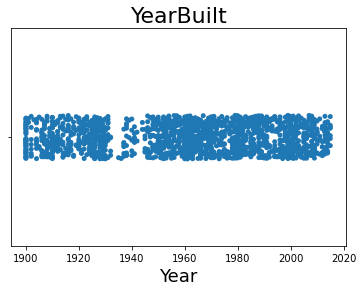

In [46]:
sns.stripplot(data = data, x="YearBuilt")
plt.title('YearBuilt')
plt.xlabel('Year');

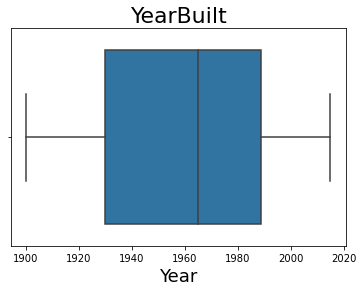

In [47]:
sns.boxplot(data = data, x="YearBuilt")
plt.title('YearBuilt')
plt.xlabel('Year');

Les valeurs de 'YearBuilt' sont dans un intervalle correct.

### NumberofFloors

In [48]:
data['NumberofFloors'].unique()

array([12, 11, 41, 10, 18,  2,  8, 15, 25,  9, 33,  6, 28,  5, 19,  7,  1,
        3,  4, 24, 20, 34,  0, 16, 23, 17, 36, 22, 47, 29, 14, 49, 37, 42,
       63, 13, 21, 55, 46, 30, 56, 76, 27, 99], dtype=int64)

La variable 'NumberofFloors' a au moins une valeur nulle, je remplace donc les valeurs 0 par la valeur 1.

In [49]:
data['NumberofFloors'].replace(0, 1, inplace=True)

Je recherche des outliers parmis les bâtiments avec le plus d'étages.

In [50]:
data[data['NumberofFloors']>50]

BuildingType PrimaryPropertyType                    PropertyName  \
233   NonResidential        Large Office  Seattle Municipal Tower (2030)   
271   NonResidential        Large Office               1201 Third Avenue   
292   NonResidential        Large Office                Two Union Square   
559   NonResidential        Large Office          Columbia Center - 2015   
1359  NonResidential    Worship Facility  Seattle Chinese Baptist Church   

                       Address  ZipCode      Neighborhood  Latitude  \
233           700 Fifth Avenue  98104.0          DOWNTOWN  47.60501   
271               1201 3rd ave  98101.0          DOWNTOWN  47.60723   
292              601 Union St.  98101.0          DOWNTOWN  47.61043   
559             701 5th Avenue  98104.0          DOWNTOWN  47.60454   
1359  5801 Beacon Avenue South  98108.0  GREATER DUWAMISH  47.55072   

      Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
233  -122.32988       1990                1.0              63   
271  -122.33611       1988                1.0              55   
292  -122.33206       1989                1.0              56   
559  -122.33072       1985                1.0              76   
1359 -122.30265       1977                1.0              99   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
233            1354987              159600                 1195387   
271            1400000              285000                 1115000   
292            1605578              389860                 1215718   
559            1952220              319400                 1632820   
1359             21948                   0                   21948   

               ListOfAllPropertyUseTypes LargestPropertyUseType  \
233                      Office, Parking                 Office   
271   Office, Other, Parking, Restaurant                 Office   
292               Office, Other, Parking                 Office   
559                      Office, Parking                 Office   
1359                    Worship Facility       Worship Facility   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
233                   1191115.0                      Parking   
271                    994116.0                      Parking   
292                   1314475.0                      Parking   
559                   1680937.0                      Parking   
1359                    21948.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
233                          159599.0                       Other   
271                          264481.0                       Other   
292                          389860.0                       Other   
559                          319368.0                         NaN   
1359                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
233                          18656.0             89.0           6.157618e+07   
271                         133598.0             92.0           5.514030e+07   
292                          30744.0             97.0           5.098450e+07   
559                              NaN             86.0           9.253726e+07   
1359                             NaN             80.0           3.260012e+05   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu) ComplianceStatus  \
233            0.000         61576180.0               0.0        Compliant   
271      2179487.750         49472833.0         1426840.0        Compliant   
292       915654.875         46081813.0         2520230.0        Compliant   
559            0.000         87851862.0         5085763.0        Compliant   
1359           0.000           326001.0               0.0        Compliant   

      TotalGHGEmissions  GHGEmissionsIntensity  
233              429.27                   0.32  
271              588.90                   0.42  
292         

La 'Seattle Chinese Baptist Church' n'a en fait que 2 étages et non 99. Les autres bâtiments sont effectivement de hautes tours.

In [51]:
data.loc[1359,'NumberofFloors'] = 2

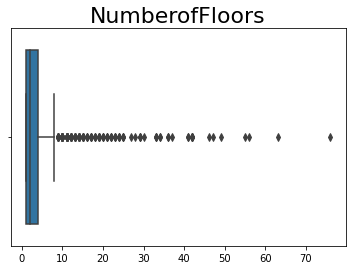

In [52]:
sns.boxplot(data = data, x="NumberofFloors")
plt.title('NumberofFloors')
plt.xlabel('');

### PropertyGFATotal

Il faut noter que GFA signifie Gross Floor Area (superficie de plancher brute), en m².

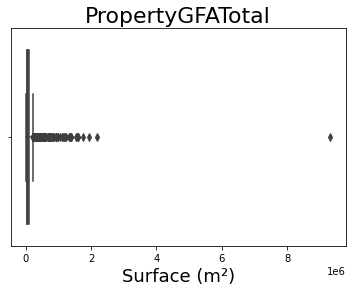

In [53]:
sns.boxplot(data = data, x="PropertyGFATotal")
plt.title('PropertyGFATotal')
plt.xlabel('Surface (m²)');

### PropertyGFAParking

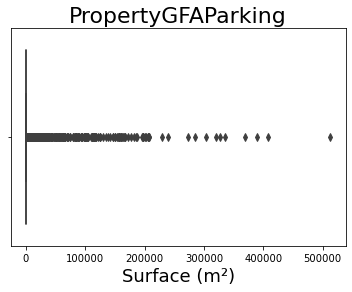

In [54]:
sns.boxplot(data = data, x="PropertyGFAParking")
plt.title('PropertyGFAParking')
plt.xlabel('Surface (m²)');

### PropertyGFABuilding(s)

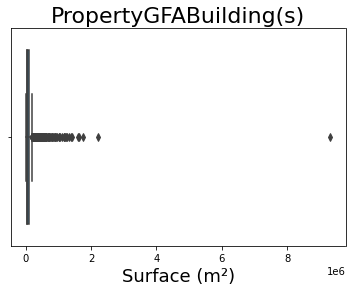

In [55]:
sns.boxplot(data = data, x="PropertyGFABuilding(s)")
plt.title('PropertyGFABuilding(s)')
plt.xlabel('Surface (m²)');

In [56]:
print("Le dataset compte {} lignes et {} colonnes.".format(data.shape[0], data.shape[1]))

Le dataset compte 1639 lignes et 29 colonnes.


In [57]:
data.select_dtypes('int64').columns

Index(['YearBuilt', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)'],
      dtype='object')

## <font color="#114b98" id="section_4">4. Traitement détaillé des variables de type 'int64'</font>

In [58]:
for col in data.select_dtypes('float64').columns:
    print(f'{col :-<35} : {data[col].dtypes}    {data[col].isna().sum()} valeurs manquantes    {data[col].nunique()} valeurs uniques')

ZipCode---------------------------- : float64    16 valeurs manquantes    48 valeurs uniques
Latitude--------------------------- : float64    0 valeurs manquantes    1471 valeurs uniques
Longitude-------------------------- : float64    0 valeurs manquantes    1385 valeurs uniques
NumberofBuildings------------------ : float64    2 valeurs manquantes    16 valeurs uniques
LargestPropertyUseTypeGFA---------- : float64    6 valeurs manquantes    1536 valeurs uniques
SecondLargestPropertyUseTypeGFA---- : float64    801 valeurs manquantes    687 valeurs uniques
ThirdLargestPropertyUseTypeGFA----- : float64    1297 valeurs manquantes    292 valeurs uniques
ENERGYSTARScore-------------------- : float64    561 valeurs manquantes    100 valeurs uniques
SiteEnergyUseWN(kBtu)-------------- : float64    3 valeurs manquantes    1611 valeurs uniques
SteamUse(kBtu)--------------------- : float64    2 valeurs manquantes    115 valeurs uniques
Electricity(kBtu)------------------ : float64    2 valeurs m

### ZipCode

Je décide de supprimer la variable 'ZipCode' car nous avons déjà les quartier et les latitudes/longitudes.

In [59]:
data.drop(['ZipCode'], axis = 1, inplace = True)

### Latitude et Longitude

In [60]:
import folium
from folium import plugins
from folium.plugins import MeasureControl
from branca.colormap import linear
from branca import colormap
from branca import colormap as cm

In [61]:
carte = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()],zoom_start=11)

for i in range(0,len(data)):
    folium.Circle([data.iloc[i]['Latitude'],data.iloc[i]['Longitude']], 
                   popup=data.iloc[i]['PropertyName'], radius = 30, color = '#114b98').add_to(carte)

In [62]:
carte

Je remarque que tous les bâtiments sont bien situés dans la ville de Seattle donc les valeurs des longitudes et latitudes semblent correctes.

### NumberofBuildings

La variable 'NumberofBuildings' est catégorisée en 'float' alors qu'elle soit être du type 'int'.

In [63]:
data['NumberofBuildings'].unique()

array([  1.,   3.,   0.,   2.,   4.,  27.,   6.,  11.,  14.,   9.,  nan,
         7.,   5.,   8.,  23.,  10., 111.])

Elle comporte aussi des 'nan' et des valeurs nulles, et ces dernières sont impossibles.

In [64]:
data['NumberofBuildings'].fillna(0, inplace=True)
data['NumberofBuildings'].replace(0, 1, inplace=True)
data['NumberofBuildings'] = data['NumberofBuildings'].astype('int64')

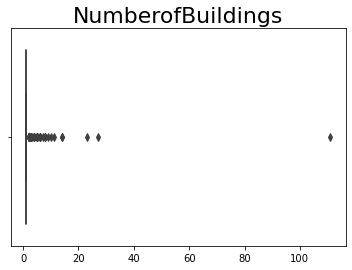

In [65]:
sns.boxplot(data = data, x="NumberofBuildings")
plt.title('NumberofBuildings')
plt.xlabel('');

### LargestPropertyUseTypeGFA

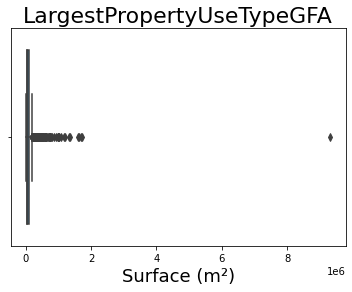

In [66]:
sns.boxplot(data = data, x="LargestPropertyUseTypeGFA")
plt.title('LargestPropertyUseTypeGFA')
plt.xlabel('Surface (m²)');

In [67]:
data[data['LargestPropertyUseTypeGFA'].isna()]

BuildingType          PrimaryPropertyType  \
353   NonResidential        Self-Storage Facility   
578   NonResidential  Small- and Mid-Sized Office   
1147  NonResidential                        Hotel   
2414  NonResidential  Small- and Mid-Sized Office   
2459  NonResidential                   Restaurant   
2670  NonResidential           Mixed Use Property   

                          PropertyName                 Address Neighborhood  \
353                   Market St Center   2811 NW Market Street      BALLARD   
578                   SEATTLE BUILDING         215 COLUMBIA ST     DOWNTOWN   
1147                   Palladian Hotel      2000 Second Avenue     DOWNTOWN   
2414               Talon Northlake LLC    1341 N Northlake Way   LAKE UNION   
2459  BUSH GARDEN - RESTURANT & LOUNGE     614 S MAYNARD AVE S     DOWNTOWN   
2670                  KALBERG BUILDING  4515 UNIVERSITY WAY NE    NORTHEAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
353   47.66838 -122.39310       1946                  2               2   
578   47.60380 -122.33293       1924                  1               4   
1147  47.61203 -122.34165       1910                  1               8   
2414  47.64747 -122.34086       2008                  1               4   
2459  47.59697 -122.32474       1913                  1               3   
2670  47.66182 -122.31345       1928                  1               2   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
353             111445                   0                  111445   
578              63150                   0                   63150   
1147             61721                   0                   61721   
2414             48350                   0                   48350   
2459             28800                   0                   28800   
2670             20760                   0                   20760   

                              ListOfAllPropertyUseTypes  \
353   Fitness Center/Health Club/Gym, Office, Other ...   
578                                                 NaN   
1147                                              Hotel   
2414                                             Office   
2459                                         Restaurant   
2670                                                NaN   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
353                     NaN                        NaN   
578                     NaN                        NaN   
1147                    NaN                        NaN   
2414                    NaN                        NaN   
2459                    NaN                        NaN   
2670                    NaN                        NaN   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
353                           NaN                              NaN   
578                           NaN                              NaN   
1147                          NaN                              NaN   
2414                          NaN                              NaN   
2459                          NaN                              NaN   
2670                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
353                          NaN                             NaN   
578                          NaN                             NaN   
1147                         NaN                             NaN   
2414                         NaN                             NaN   
2459                         NaN                             NaN   
2670                         NaN                             NaN   

      ENERGYSTARScore  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
353               NaN           6.076957e+06             0.0   
578               NaN                    NaN             NaN   
1147             93.0           2.968430e+06             0.0   
2414             45.

In [68]:
data.loc[data['LargestPropertyUseTypeGFA'].isna(),'LargestPropertyUseTypeGFA'] = data.loc[data['LargestPropertyUseTypeGFA'].
                                                                                          isna(),'PropertyGFATotal']

### SecondLargestPropertyUseTypeGFA et ThirdLargestPropertyUseTypeGFA

Les données manquantes des variables 'SecondLargestPropertyUseTypeGFA' et 'ThirdLargestPropertyUseTypeGFA' peuvent ne pas être dues à une absence de mesure mais juste au fait qu'elles sont nulles : ces adresses ont un seul type d'utilisation.

In [69]:
data['SecondLargestPropertyUseTypeGFA'] = data['SecondLargestPropertyUseTypeGFA'].fillna(0)
data['ThirdLargestPropertyUseTypeGFA'] = data['ThirdLargestPropertyUseTypeGFA'].fillna(0)

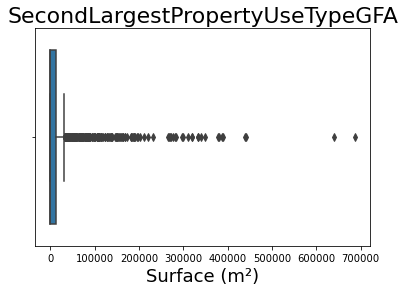

In [70]:
sns.boxplot(data = data, x="SecondLargestPropertyUseTypeGFA")
plt.title('SecondLargestPropertyUseTypeGFA')
plt.xlabel('Surface (m²)');

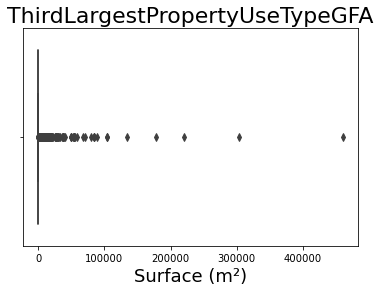

In [71]:
sns.boxplot(data = data, x="ThirdLargestPropertyUseTypeGFA")
plt.title('ThirdLargestPropertyUseTypeGFA')
plt.xlabel('Surface (m²)');

### ENERGYSTARScore

In [72]:
(data['ENERGYSTARScore']>100).sum()

0

### Variables énergétiques

In [73]:
data['SiteEnergyUseWN(kBtu)'].isna().sum()

3

In [74]:
data['SteamUse(kBtu)'].isna().sum()

2

In [75]:
data['Electricity(kBtu)'].isna().sum()

2

In [76]:
data[data['SiteEnergyUseWN(kBtu)'].isna() | data['SteamUse(kBtu)'].isna() | data['Electricity(kBtu)'].isna() | 
     data['NaturalGas(kBtu)'].isna() | data['TotalGHGEmissions'].isna()]

BuildingType          PrimaryPropertyType  \
563   NonResidential                 Large Office   
578   NonResidential  Small- and Mid-Sized Office   
2670  NonResidential           Mixed Use Property   

                                 PropertyName                 Address  \
563   Market Place I & II-2003 Western Avenue     2003 Western Avenue   
578                          SEATTLE BUILDING         215 COLUMBIA ST   
2670                         KALBERG BUILDING  4515 UNIVERSITY WAY NE   

     Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
563      DOWNTOWN  47.61051 -122.34439       1979                  1   
578      DOWNTOWN  47.60380 -122.33293       1924                  1   
2670    NORTHEAST  47.66182 -122.31345       1928                  1   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
563                7            131143               87160   
578                4             63150                   0   
2670               2             20760                   0   

      PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
563                    43983      Office, Retail Store                 Office   
578                    63150                       NaN                    NaN   
2670                   20760                       NaN                    NaN   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
563                    120248.0                 Retail Store   
578                     63150.0                          NaN   
2670                    20760.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
563                           10853.0                         NaN   
578                               0.0                         NaN   
2670                              0.0                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
563                              0.0             93.0                    NaN   
578                              0.0              NaN                    NaN   
2670                             0.0              NaN                    NaN   

      SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu) ComplianceStatus  \
563              0.0          4871126.0         1416041.0        Compliant   
578              NaN                NaN               NaN    Non-Compliant   
2670             NaN                NaN               NaN    Non-Compliant   

      TotalGHGEmissions  GHGEmissionsIntensity  
563              109.16                   0.83  
578                 NaN                    NaN  
2670                NaN                    NaN

L'intégralité des valeurs manquantes liées à l'énergie porte sur uniquement 3 observations.

Je décide de les supprimer.

In [77]:
idx_values_to_drop = data[data['SiteEnergyUseWN(kBtu)'].isna() | data['SteamUse(kBtu)'].isna() | 
                          data['Electricity(kBtu)'].isna() | data['NaturalGas(kBtu)'].isna() | 
                          data['TotalGHGEmissions'].isna()].index

In [78]:
data.drop(idx_values_to_drop, axis = 0, inplace = True)

Je regarde aussi quelles sont les observations pour lesquelles toutes las variables énergétiques sont nulles.

In [79]:
data[(data['SteamUse(kBtu)']==0) & (data['Electricity(kBtu)']==0) & (data['NaturalGas(kBtu)']==0)]

BuildingType          PrimaryPropertyType  \
28         Education                  K-12 School   
152        Education                  K-12 School   
304   NonResidential                        Other   
513   NonResidential  Supermarket / Grocery Store   
746   NonResidential                        Other   
1361       Education                  K-12 School   

                            PropertyName                Address  \
28                        Meany Building   301/300 21st Ave. E.   
152              Olympic View Elementary      504 N.E. 95th St.   
304   Washington State Convention Center            705 Pike St   
513            IUC- Whole Foods Interbay  2001 15th Avenue West   
746       Welcome Home Society - PriceCo     13537 Aurora Ave N   
1361            Olympic Hills Elementary   13018 20th Ave. N.E.   

               Neighborhood  Latitude  Longitude  YearBuilt  \
28                  Central  47.62266 -122.30547       1955   
152                   NORTH  47.69823 -122.32126       1989   
304                DOWNTOWN  47.61195 -122.33167       1990   
513   MAGNOLIA / QUEEN ANNE  47.63718 -122.37734       2008   
746               NORTHWEST  47.72777 -122.34503       2002   
1361                  NORTH  47.72369 -122.30676       1954   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
28                    1               1            126351                   0   
152                   1               2             52792                   0   
304                   1               6           1400000                   0   
513                   1               1             57176                   0   
746                   1               1             29924                   0   
1361                  1               1             42292                   0   

      PropertyGFABuilding(s)  \
28                    126351   
152                    52792   
304                  1400000   
513                    57176   
746                    29924   
1361                   42292   

                              ListOfAllPropertyUseTypes  \
28                                          K-12 School   
152                                         K-12 School   
304                          Convention Center, Parking   
513   Personal Services (Health/Beauty, Dry Cleaning...   
746                                   Other - Education   
1361                                        K-12 School   

         LargestPropertyUseType  LargestPropertyUseTypeGFA  \
28                  K-12 School                   126351.0   
152                 K-12 School                    55480.0   
304           Convention Center                  1072000.0   
513   Supermarket/Grocery Store                    39500.0   
746           Other - Education                    29924.0   
1361                K-12 School                    43188.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
28                            NaN                              0.0   
152                           NaN                              0.0   
304                       Parking                         686750.0   
513                  Retail Store                          15000.0   
746                           NaN                              0.0   
1361                          NaN                              0.0   

                            ThirdLargestPropertyUseType  \
28                                                  NaN   
152                                                 NaN   
304                                                 NaN   
513   Personal Services (Health/Beauty, Dry Cleaning...   
746                                                 NaN   
1361                                                NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
28                               0.0              NaN                    0.0   
152              

In [80]:
idx_values_to_drop = data[(data['SteamUse(kBtu)']==0) & (data['Electricity(kBtu)']==0) & (data['NaturalGas(kBtu)']==0)].index

In [81]:
data.drop(idx_values_to_drop, axis = 0, inplace = True)

Je regarde les valeurs pour lesquelles 'SiteEnergyUseWN(kBtu)' vaut 0 et je remplace par la somme des 3 autres colonnes énergétiques.

In [82]:
#data[(data['SiteEnergyUseWN(kBtu)']==0)]

In [83]:
data.loc[data['SiteEnergyUseWN(kBtu)']==0, 'SiteEnergyUseWN(kBtu)'] = data.loc[data['SiteEnergyUseWN(kBtu)']==0, 'SteamUse(kBtu)'] + data.loc[data['SiteEnergyUseWN(kBtu)']==0, 'Electricity(kBtu)'] + data.loc[data['SiteEnergyUseWN(kBtu)']==0, 'NaturalGas(kBtu)']

On calcule les proportions de chaque source d'énergie car **Douglas** nous a autorisé à le faire.

Douglas : "L’objectif est de te passer des relevés de consommation annuels futurs (attention à la fuite de données). Nous ferons de toute façon pour tout nouveau bâtiment un premier relevé de référence la première année, donc **rien ne t'interdit d’en déduire des variables structurelles aux bâtiments, par exemple la nature et proportions des sources d’énergie utilisées.**"

In [84]:
data[data["Electricity(kBtu)"] == 0]

BuildingType PrimaryPropertyType            PropertyName  \
133        Education         K-12 School          Whitman Middle   
139        Education         K-12 School       Washington Middle   
426   NonResidential          Restaurant                 Pier 57   
1894       Education         K-12 School  North Beach Elementary   
3166       Education         K-12 School    Catharine Blaine K-8   

                 Address           Neighborhood  Latitude  Longitude  \
133   9201 15th Ave. NW.                BALLARD  47.69675 -122.37760   
139      2101 S. Jackson                CENTRAL  47.59796 -122.30415   
426     1301 Alaskan Way               DOWNTOWN  47.60613 -122.34115   
1894  9018 24th Ave N.W.                BALLARD  47.69497 -122.38704   
3166   2550 34th Ave. W.  MAGNOLIA / QUEEN ANNE  47.64342 -122.39970   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
133        1959                  1               1            160270   
139        1963                  1               3            136188   
426        1900                  1               1             43728   
1894       1958                  1               1             39971   
3166       1952                  1               1            116101   

      PropertyGFAParking  PropertyGFABuilding(s) ListOfAllPropertyUseTypes  \
133                    0                  160270               K-12 School   
139                    0                  136188               K-12 School   
426                    0                   43728                Restaurant   
1894                   0                   39971               K-12 School   
3166                   0                  116101               K-12 School   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
133             K-12 School                   160270.0   
139             K-12 School                   136188.0   
426              Restaurant                    43728.0   
1894            K-12 School                    40867.0   
3166            K-12 School                   119685.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
133                           NaN                              0.0   
139                           NaN                              0.0   
426                           NaN                              0.0   
1894                          NaN                              0.0   
3166                          NaN                              0.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
133                          NaN                             0.0   
139                          NaN                             0.0   
426                          NaN                             0.0   
1894                         NaN                             0.0   
3166                         NaN                             0.0   

      ENERGYSTARScore  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
133               NaN              4318917.0             0.0   
139               NaN              3217877.0             0.0   
426               NaN             11854450.0             0.0   
1894              NaN               945537.0             0.0   
3166              NaN              4993620.0             0.0   

      Electricity(kBtu)  NaturalGas(kBtu) ComplianceStatus  TotalGHGEmissions  \
133                 0.0         4318917.0     Missing Data             229.38   
139                 0.0         3217877.0     Missing Data             170.90   
426                 0.0        11508035.0        Compliant             611.19   
1894                0.0          945537.0     Missing Data              50.22   
3166                0.0         4993620.0     Missing Data             265.21   

      GHGEmissionsIntensity  
133                    1.43  
139                    1.25  
426                   13.98  
1894                   1.26  
3166                   2.28

In [85]:
data["ElectricityProp"] = data["Electricity(kBtu)"]/data["SiteEnergyUseWN(kBtu)"]
data["NaturalGasProp"] = data["NaturalGas(kBtu)"]/data["SiteEnergyUseWN(kBtu)"]
data["SteamUseProp"] = data["SteamUse(kBtu)"]/data["SiteEnergyUseWN(kBtu)"]

In [86]:
data.drop(['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',], 
          inplace = True, 
          axis = 1)

In [87]:
data.select_dtypes('float64').columns

Index(['Latitude', 'Longitude', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'ElectricityProp', 'NaturalGasProp',
       'SteamUseProp'],
      dtype='object')

## <font color="#114b98" id="section_5">5. Traitement détaillé des variables de type 'object'</font>

In [88]:
for col in data.select_dtypes('object').columns:
    print(f'{col :-<35} : {data[col].dtypes}    {data[col].isna().sum()} valeurs manquantes    {data[col].nunique()} valeurs uniques')

BuildingType----------------------- : object    0 valeurs manquantes    2 valeurs uniques
PrimaryPropertyType---------------- : object    0 valeurs manquantes    21 valeurs uniques
PropertyName----------------------- : object    0 valeurs manquantes    1626 valeurs uniques
Address---------------------------- : object    0 valeurs manquantes    1610 valeurs uniques
Neighborhood----------------------- : object    0 valeurs manquantes    19 valeurs uniques
ListOfAllPropertyUseTypes---------- : object    0 valeurs manquantes    359 valeurs uniques
LargestPropertyUseType------------- : object    4 valeurs manquantes    54 valeurs uniques
SecondLargestPropertyUseType------- : object    795 valeurs manquantes    47 valeurs uniques
ThirdLargestPropertyUseType-------- : object    1289 valeurs manquantes    39 valeurs uniques
ComplianceStatus------------------- : object    0 valeurs manquantes    3 valeurs uniques


### PropertyName

Je supprime la variable 'PropertyName' non nécessaire pour la modélisation.

In [89]:
data.drop(['PropertyName'], axis = 1, inplace = True)

### Address

Je vais supprimer la variable 'Address' car je préfère utiliser les latitudes et longitudes.

In [90]:
data.drop(['Address'], axis = 1, inplace = True)

### Neignborhood

La variable 'Neignborhood' comprend des erreurs de formatage 
 - 'CENTRAL' et 'Central'
 - 'DELRIDGE NEIGHBORHOODS' et 'DELRIDGE'
 - 'BALLARD' et 'Ballard'
 - ...

In [91]:
data['Neighborhood'] = data['Neighborhood'].map(lambda x: x.upper())
data['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)

In [92]:
data['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE'],
      dtype=object)

### ComplianceStatus

Information sur la variable 'ComplianceStatus' : Whether a property has met energy benchmarking requirements for the current reporting year.

Je décide de simplifier la variable 'ComplicanceStatus' en remplaçant les valeurs 'Error - Correct Default Data' et 'Missing Data' par np.nan.

In [93]:
data['ComplianceStatus'].replace('Error - Correct Default Data', np.nan, inplace=True)
data['ComplianceStatus'].replace('Missing Data', np.nan, inplace=True)

Tous les bâtiments qui ont un ENERGYSTARScore sont compliants. Je vais donc affecter 'Compliant' aux bâtiments dans ce cas et pour lesquels 'ComplianceStatus' est manquant.

In [94]:
mask = data[~data['ENERGYSTARScore'].isna() & data['ComplianceStatus'].isna()]
data.loc[mask.index,'ComplianceStatus'] = 'Compliant'

Je supprime finalement cette variable car nous ne connaitrons pas cette donnée pour les nouveaux bâtiments.

In [95]:
data = data.drop(['ComplianceStatus'], axis=1)

### Variables PropertyUseType

Il me reste à analyser les catégories des colonnes :
 - PrimaryPropertyType
 - ListOfAllPropertyUseTypes
 - LargestPropertyUseType
 - SecondLargestPropertyUseType
 - ThirdLargestPropertyUseType


In [96]:
#data['PrimaryPropertyType'].value_counts()

In [97]:
data.loc[data['PrimaryPropertyType']=='Residence Hall'].head()

BuildingType PrimaryPropertyType           Neighborhood  Latitude  \
115  NonResidential      Residence Hall  MAGNOLIA / QUEEN ANNE  47.65068   
186  NonResidential      Residence Hall               DOWNTOWN  47.60790   
858  NonResidential      Residence Hall              NORTHEAST  47.66282   
890  NonResidential      Residence Hall              NORTHEAST  47.66159   
934  NonResidential      Residence Hall              NORTHEAST  47.65711   

     Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
115 -122.36331       2001                  1               4   
186 -122.33266       1913                  1               9   
858 -122.30500       1921                  1               3   
890 -122.30441       1930                  1               3   
934 -122.31409       1993                  1               3   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
115            139600               37500                  102100   
186            107572                   0                  107572   
858             21499                   0                   21499   
890             20960                   0                   20960   
934             28572                   0                   28572   

                          ListOfAllPropertyUseTypes    LargestPropertyUseType  \
115                        Residence Hall/Dormitory  Residence Hall/Dormitory   
186  Office, Residence Hall/Dormitory, Retail Store  Residence Hall/Dormitory   
858                        Residence Hall/Dormitory  Residence Hall/Dormitory   
890                        Residence Hall/Dormitory  Residence Hall/Dormitory   
934               Parking, Residence Hall/Dormitory  Residence Hall/Dormitory   

     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
115                   135520.0                          NaN   
186                    63934.0                       Office   
858                    21499.0                          NaN   
890                    20960.0                          NaN   
934                    22000.0                      Parking   

     SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
115                              0.0                         NaN   
186                          27143.0                Retail Store   
858                              0.0                         NaN   
890                              0.0                         NaN   
934                           7000.0                         NaN   

     ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
115                             0.0             89.0           4.800620e+06   
186                         10568.0             76.0           5.879083e+06   
858                             0.0             85.0           6.051307e+05   
890                             0.0              NaN           1.667310e+06   
934                             0.0             16.0           2.759012e+06   

     TotalGHGEmissions  GHGEmissionsIntensity  ElectricityProp  \
115             129.39                   0.93         0.482500   
186             254.87                   2.37         0.424566   
858               4.22                   0.20         0.999999   
890              64.51                   3.08         0.197204   
934              89.57                   3.13         0.430290   

     NaturalGasProp  SteamUseProp  
115        0.444168      0.000000  
186        0.000000      0.523287  
858        0.000000      0.000000  
890        0.702635      0.000000  
934        0.554796      0.000000

Je supprime ces observations car elles correspondent à des résidences.

In [98]:
data.drop((data[data['PrimaryPropertyType']=='Residence Hall']).index, inplace = True, axis = 0)

In [99]:
data['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    287
Other                          245
Warehouse                      187
Large Office                   169
K-12 School                    134
Mixed Use Property             104
Retail Store                    89
Hotel                           75
Worship Facility                69
Distribution Center             53
Supermarket / Grocery Store     39
Medical Office                  39
Self-Storage Facility           28
University                      24
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [100]:
data['LargestPropertyUseType'].value_counts()

Office                                                  489
Non-Refrigerated Warehouse                              199
K-12 School                                             134
Retail Store                                             97
Other                                                    95
Hotel                                                    75
Worship Facility                                         69
Distribution Center                                      54
Medical Office                                           41
Supermarket/Grocery Store                                40
Other - Recreation                                       31
Parking                                                  30
Self-Storage Facility                                    27
College/University                                       24
Other - Entertainment/Public Assembly                    21
Senior Care Community                                    20
Laboratory                              

Je veux compléter les valeurs manquantes de 'LargestPropertyUseType' à l'aide des autres paramètres.

In [101]:
data[data['LargestPropertyUseType'].isna()]

BuildingType          PrimaryPropertyType Neighborhood  Latitude  \
353   NonResidential        Self-Storage Facility      BALLARD  47.66838   
1147  NonResidential                        Hotel     DOWNTOWN  47.61203   
2414  NonResidential  Small- and Mid-Sized Office   LAKE UNION  47.64747   
2459  NonResidential                   Restaurant     DOWNTOWN  47.59697   

      Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
353  -122.39310       1946                  2               2   
1147 -122.34165       1910                  1               8   
2414 -122.34086       2008                  1               4   
2459 -122.32474       1913                  1               3   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
353             111445                   0                  111445   
1147             61721                   0                   61721   
2414             48350                   0                   48350   
2459             28800                   0                   28800   

                              ListOfAllPropertyUseTypes  \
353   Fitness Center/Health Club/Gym, Office, Other ...   
1147                                              Hotel   
2414                                             Office   
2459                                         Restaurant   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
353                     NaN                   111445.0   
1147                    NaN                    61721.0   
2414                    NaN                    48350.0   
2459                    NaN                    28800.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
353                           NaN                              0.0   
1147                          NaN                              0.0   
2414                          NaN                              0.0   
2459                          NaN                              0.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
353                          NaN                             0.0   
1147                         NaN                             0.0   
2414                         NaN                             0.0   
2459                         NaN                             0.0   

      ENERGYSTARScore  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
353               NaN           6.076957e+06             163.83   
1147             93.0           2.968430e+06              36.92   
2414             45.0           3.280956e+06              22.09   
2459              NaN           9.358332e+05              29.21   

      GHGEmissionsIntensity  ElectricityProp  NaturalGasProp  SteamUseProp  
353                    1.47         0.494905        0.442649           0.0  
1147                   0.60         0.853849        0.122114           0.0  
2414                   0.46         0.965612        0.000000           0.0  
2459                   1.01         0.430533        0.531096           0.0

In [102]:
data.loc[data['LargestPropertyUseType'].isna(),'PrimaryPropertyType']

353           Self-Storage Facility
1147                          Hotel
2414    Small- and Mid-Sized Office
2459                     Restaurant
Name: PrimaryPropertyType, dtype: object

Je complète 'LargestPropertyUseType' avec 'PrimaryPropertyType' .

In [103]:
data.loc[data['LargestPropertyUseType'].isna(),'LargestPropertyUseType'] = data.loc[data['LargestPropertyUseType'].
                                                                                          isna(),'PrimaryPropertyType']

In [104]:
data[data['LargestPropertyUseType']=='Residence Hall/Dormitory']

BuildingType PrimaryPropertyType Neighborhood  Latitude  Longitude  \
2407  NonResidential  Mixed Use Property     DOWNTOWN   47.6005 -122.33514   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
2407       2005                  1               5             57600   

      PropertyGFAParking  PropertyGFABuilding(s)  \
2407                   0                   57600   

                              ListOfAllPropertyUseTypes  \
2407  Financial Office, Multifamily Housing, Parking...   

        LargestPropertyUseType  LargestPropertyUseTypeGFA  \
2407  Residence Hall/Dormitory                    27600.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
2407          Multifamily Housing                          16000.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
2407            Financial Office                          7000.0   

      ENERGYSTARScore  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
2407              NaN              7355579.0             223.36   

      GHGEmissionsIntensity  ElectricityProp  NaturalGasProp  SteamUseProp  
2407                   3.88         0.434761        0.514686           0.0

In [105]:
data.drop(data[data['LargestPropertyUseType']=='Residence Hall/Dormitory'].index, inplace = True, axis = 0)

In [106]:
data.loc[data['LargestPropertyUseType']=='Other - Lodging/Residential']

BuildingType PrimaryPropertyType      Neighborhood  Latitude  \
113   NonResidential               Other  GREATER DUWAMISH  47.53722   
1928  NonResidential               Other  GREATER DUWAMISH  47.59549   
2711  NonResidential               Other          DOWNTOWN  47.60055   
2774  NonResidential               Other         NORTHEAST  47.66192   
2995  NonResidential               Other           CENTRAL  47.61796   

      Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
113  -122.28400       2009                  1               5   
1928 -122.32538       1992                  1               3   
2711 -122.33057       1904                  1               6   
2774 -122.30998       1924                  1               3   
2995 -122.30847       1911                  1               3   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
113              89821                   0                   89821   
1928             47836                7572                   40264   
2711             29820                   0                   29820   
2774             20686                   0                   20686   
2995             25200                   0                   25200   

                              ListOfAllPropertyUseTypes  \
113   Food Service, Office, Other - Lodging/Residential   
1928               Other - Lodging/Residential, Parking   
2711                        Other - Lodging/Residential   
2774                        Other - Lodging/Residential   
2995                        Other - Lodging/Residential   

           LargestPropertyUseType  LargestPropertyUseTypeGFA  \
113   Other - Lodging/Residential                    46483.0   
1928  Other - Lodging/Residential                    43336.0   
2711  Other - Lodging/Residential                    29820.0   
2774  Other - Lodging/Residential                    20686.0   
2995  Other - Lodging/Residential                    25200.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
113                        Office                          37938.0   
1928                      Parking                           4500.0   
2711                          NaN                              0.0   
2774                          NaN                              0.0   
2995                          NaN                              0.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
113                 Food Service                          4579.0   
1928                         NaN                             0.0   
2711                         NaN                             0.0   
2774                         NaN                             0.0   
2995                         NaN                             0.0   

      ENERGYSTARScore  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  \
113               NaN            2220796.500             100.46   
1928              NaN            3647847.250             109.59   
2711              NaN            1624991.375              35.72   
2774              NaN            1321763.125              42.71   
2995              NaN            1407294.875              53.02   

      GHGEmissionsIntensity  ElectricityProp  NaturalGasProp  SteamUseProp  
113                    1.12         0.030377        0.847728           0.0  
1928                   2.29         0.466023        0.504475           0.0  
2711                   1.20         0.658339        0.327485           0.0  
2774                   2.06         0.351249        0.562307           0.0  
2995                   2.10         0.199807        0.683210           0.0

In [107]:
data.drop(data.loc[data['LargestPropertyUseType']=='Other - Lodging/Residential'].index, inplace = True, axis = 0)

In [108]:
#data['SecondLargestPropertyUseType'].value_counts()

In [109]:
#data['ThirdLargestPropertyUseType'].value_counts()

Les données manquantes des variables 'SecondLargestPropertyUseType' et 'ThirdLargestPropertyUseType' peuvent ne pas être dues à une absence de mesure mais juste au fait qu'elles sont nulles : ces adresses ont un seul type d'utilisation.

In [110]:
data['SecondLargestPropertyUseType'].fillna('No information', inplace = True)
data['ThirdLargestPropertyUseType'].fillna('No information', inplace = True)

In [111]:
data.drop(['ListOfAllPropertyUseTypes'], axis = 1, inplace = True)

In [112]:
data.select_dtypes('object').columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType'],
      dtype='object')

In [113]:
print("Le dataset compte maintenant {} lignes et {} colonnes.".format(data.shape[0], data.shape[1]))
print('Données manquantes (%): ',data.isna().sum().sum()/(data.shape[0]*data.shape[1])*100)

Le dataset compte maintenant 1603 lignes et 24 colonnes.
Données manquantes (%):  1.4218132667914327


### Valeurs manquantes

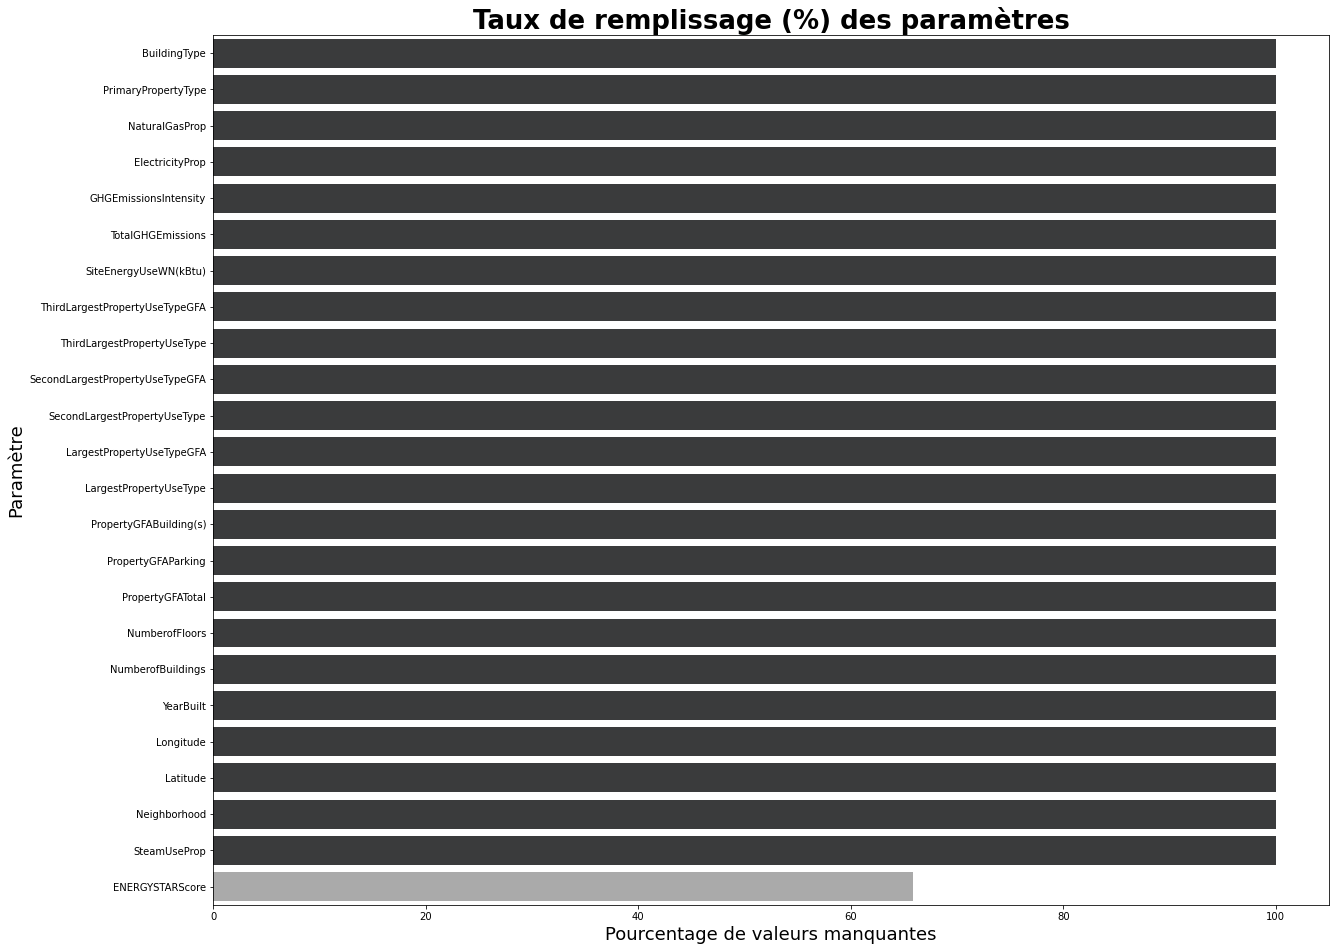

In [114]:
temp = (100-(data.isna()).sum() / data.shape[0]*100).reset_index()
temp.columns = ['Paramètre','Pourcentage de valeurs manquantes']
temp = temp.sort_values("Pourcentage de valeurs manquantes", ascending=False) 

fig = plt.figure(figsize=(20, 16))

clrs = ['#3A3B3C' if x==100 else '#70726E' if x > 99  else '#aaaaaa' for x in temp['Pourcentage de valeurs manquantes']]

sns.barplot(x = 'Pourcentage de valeurs manquantes', y = 'Paramètre', data = temp, palette=clrs)

plt.title('Taux de remplissage (%) des paramètres', weight = 'bold', size = 26)

plt.show()

In [115]:
data.reset_index(inplace = True, drop = True)

In [116]:
data.head()

BuildingType PrimaryPropertyType Neighborhood  Latitude  Longitude  \
0  NonResidential               Hotel     DOWNTOWN  47.61220 -122.33799   
1  NonResidential               Hotel     DOWNTOWN  47.61317 -122.33393   
2  NonResidential               Hotel     DOWNTOWN  47.61393 -122.33810   
3  NonResidential               Hotel     DOWNTOWN  47.61412 -122.33664   
4  NonResidential               Hotel     DOWNTOWN  47.61375 -122.34047   

   YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0       1927                  1              12             88434   
1       1996                  1              11            103566   
2       1969                  1              41            956110   
3       1926                  1              10             61320   
4       1980                  1              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s) LargestPropertyUseType  \
0                   0                   88434                  Hotel   
1               15064                   88502                  Hotel   
2              196718                  759392                  Hotel   
3                   0                   61320                  Hotel   
4               62000                  113580                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0               No information   
1                    83880.0                      Parking   
2                   756493.0               No information   
3                    61320.0               No information   
4                   123445.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              0.0              No information   
1                          15064.0                  Restaurant   
2                              0.0              No information   
3                              0.0              No information   
4                          68009.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
0                             0.0             60.0              7456910.0   
1                          4622.0             61.0              8664479.0   
2                             0.0             43.0             73937112.0   
3                             0.0             56.0              6946800.5   
4                             0.0             75.0             14656503.0   

   TotalGHGEmissions  GHGEmissionsIntensity  ElectricityProp  NaturalGasProp  \
0             249.98                   2.83         0.529177        0.171177   
1             295.86                   2.86         0.374270        0.593813   
2            2089.28                   2.19         0.669849        0.020204   
3             286.43                   4.67         0.398590        0.260726   
4             505.01                   2.88         0.366295        0.600689   

   SteamUseProp  
0      0.268728  
1      0.000000  
2      0.291688  
3      0.318772  
4      0.000000

In [117]:
print("Le dataset compte maintenant {} lignes et {} colonnes.".format(data.shape[0], data.shape[1]))

Le dataset compte maintenant 1603 lignes et 24 colonnes.


La perte d'observations due au nettoyage est majoritairement due à la suppression des "Multifamily" dans 'BuildingType'.

## <font color="#114b98" id="section_6">6. Analyse univariée</font>

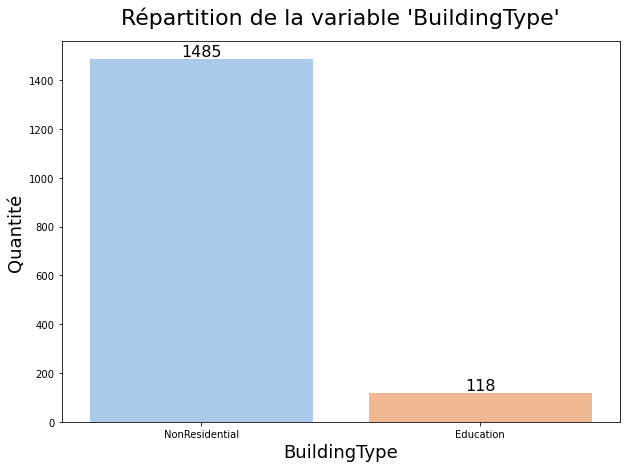

In [118]:
fig = plt.figure(figsize=(10,7))
ax = sns.countplot(x=data['BuildingType'], palette='pastel')
plt.title("Répartition de la variable 'BuildingType'", y=1.03)
plt.ylabel('Quantité')
ax.bar_label(ax.containers[0], label_type='edge', size = 16);

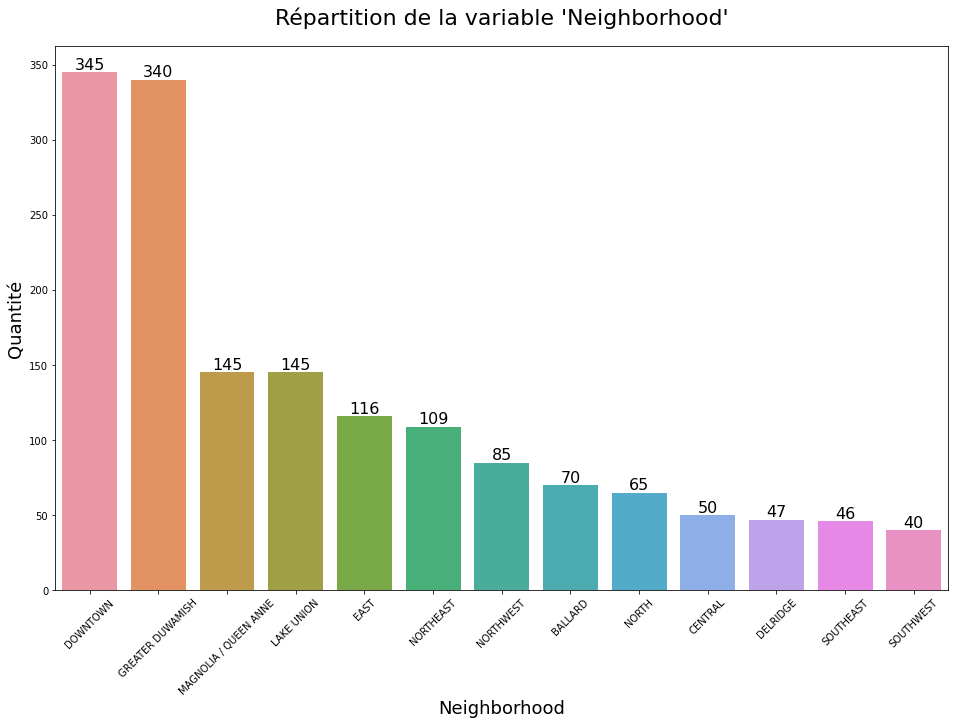

In [119]:
fig = plt.figure(figsize=(16,10))
ax = sns.countplot(x=data['Neighborhood'], order=data['Neighborhood'].value_counts().index)
plt.title("Répartition de la variable 'Neighborhood'", y=1.03)
plt.ylabel('Quantité')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], label_type='edge', size = 16);

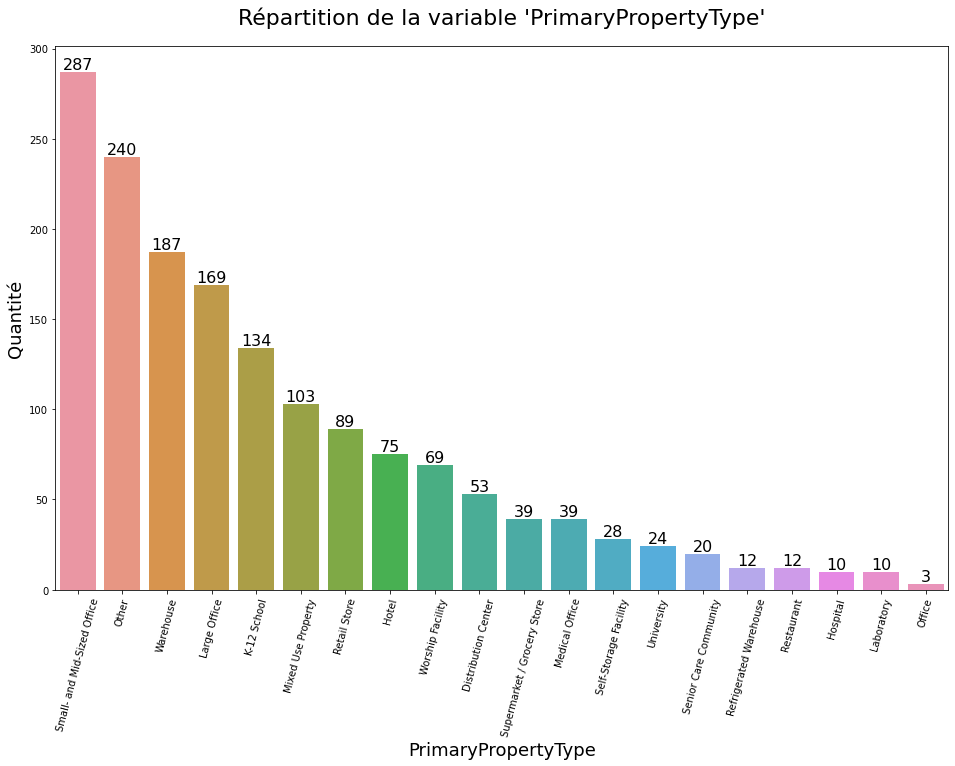

In [120]:
fig = plt.figure(figsize=(16,10))
ax = sns.countplot(x=data['PrimaryPropertyType'], order=data['PrimaryPropertyType'].value_counts().index)
plt.title("Répartition de la variable 'PrimaryPropertyType'", y=1.03)
plt.ylabel('Quantité')
plt.xticks(rotation=75)
ax.bar_label(ax.containers[0], label_type='edge', size = 16);

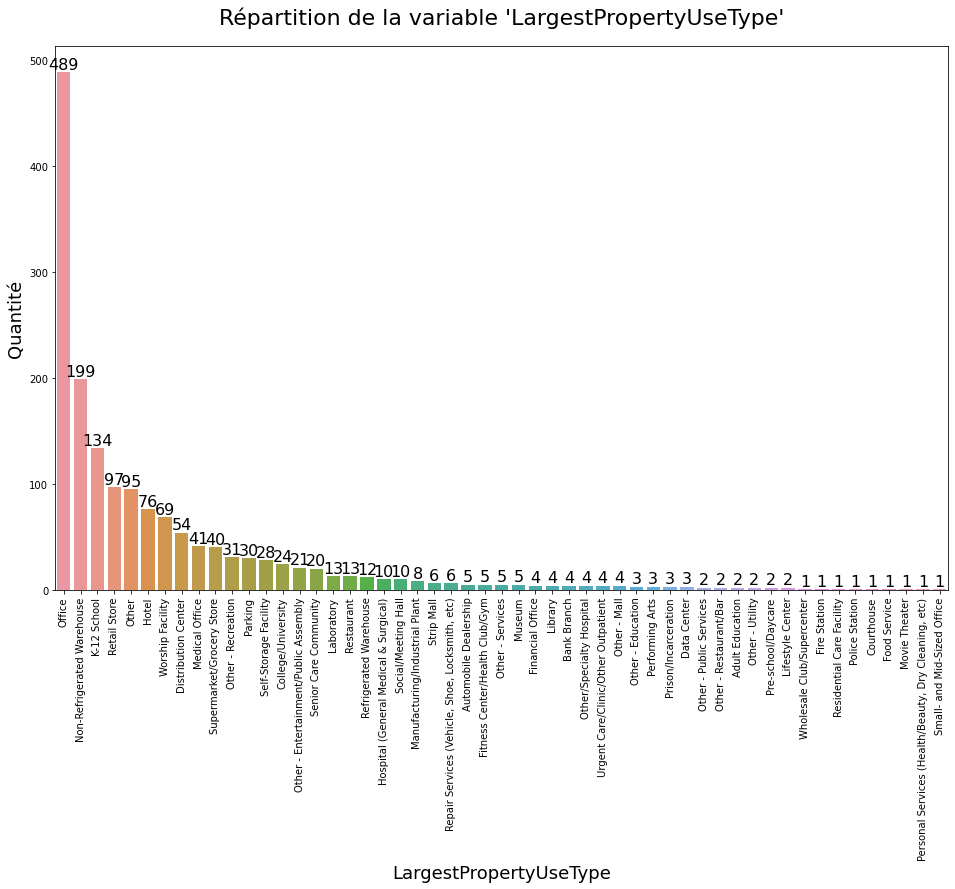

In [121]:
fig = plt.figure(figsize=(16,10))
ax = sns.countplot(x=data['LargestPropertyUseType'], order=data['LargestPropertyUseType'].value_counts().index)
plt.title("Répartition de la variable 'LargestPropertyUseType'", y=1.03)
plt.ylabel('Quantité')
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], label_type='edge', size = 16);

In [122]:
data = data.drop(['PrimaryPropertyType'], axis=1)

In [123]:
temp = data.YearBuilt.value_counts().sort_index()

idx_bins = [i for i in range(1900,2030,10)]

binus = pd.DataFrame([np.zeros(13, int)], columns = idx_bins)

for year,count in temp.items():
    if year == 1900:
        binus[year] = count
    else:
        for i in range (1910,2030,10):
            if year > (i-10) and year <= i:
                binus[i] = binus[i]+count
grp = binus.T
labels = ['Avant 1900']

for i in range (1910,2030,10):
    labels.append(str(i-10) + ' / ' + str(i-1))

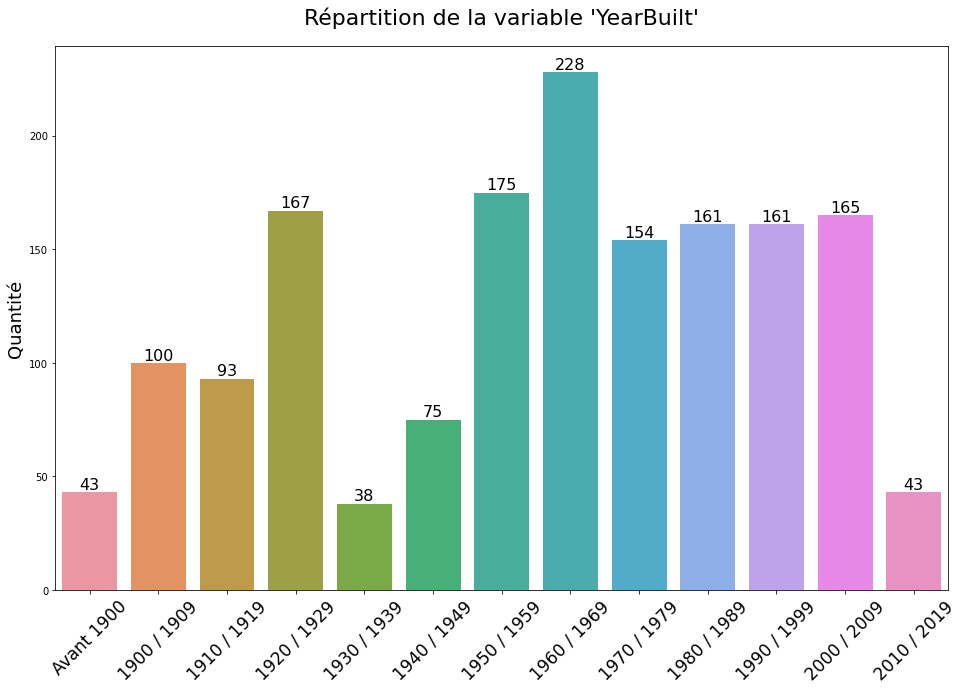

In [124]:
fig = plt.figure(figsize=(16,10))
ax = sns.barplot(x = grp.index, y = grp[0])
plt.title("Répartition de la variable 'YearBuilt'", y=1.03)
plt.ylabel('Quantité')
plt.xticks(np.arange(len(labels)),  labels, rotation=45, fontsize='17')
ax.bar_label(ax.containers[0], label_type='edge', size = 16);

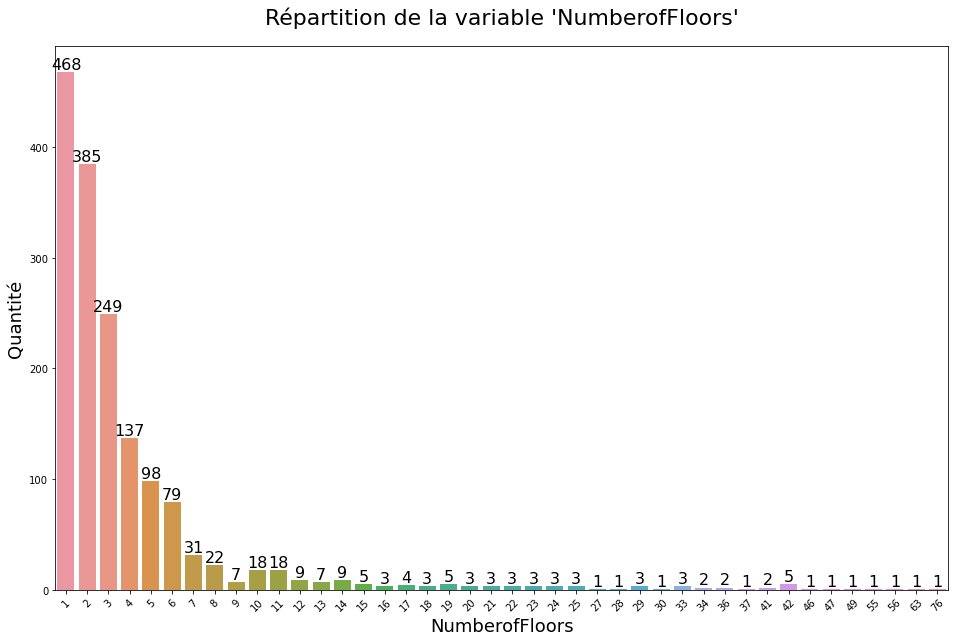

In [125]:
fig = plt.figure(figsize=(16,10))
ax = sns.countplot(x=data['NumberofFloors'])
plt.title("Répartition de la variable 'NumberofFloors'", y=1.03)
plt.ylabel('Quantité')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], label_type='edge', size = 16);

Cette variable pourra être passé en log au regard de sa distribution.

In [126]:
temp = data['PropertyGFABuilding(s)']

idx_bins = [i for i in range(0,500000,25000)]
idx_bins.append('5000000 et plus')

binus = pd.DataFrame([np.zeros(21, int)], columns = idx_bins)

for surface in temp.values:
    for i in range (0,450000,25000):
        if surface > i and surface < i+25000:
            binus[i] = binus[i]+1
    binus['5000000 et plus'] = sum(temp>=500000)
    
grp = binus.T

labels = []

for i in range (0,500000,25000):
    labels.append(str(i) + ' / ' + str(i+25000))
    
labels.append('500000 et plus')

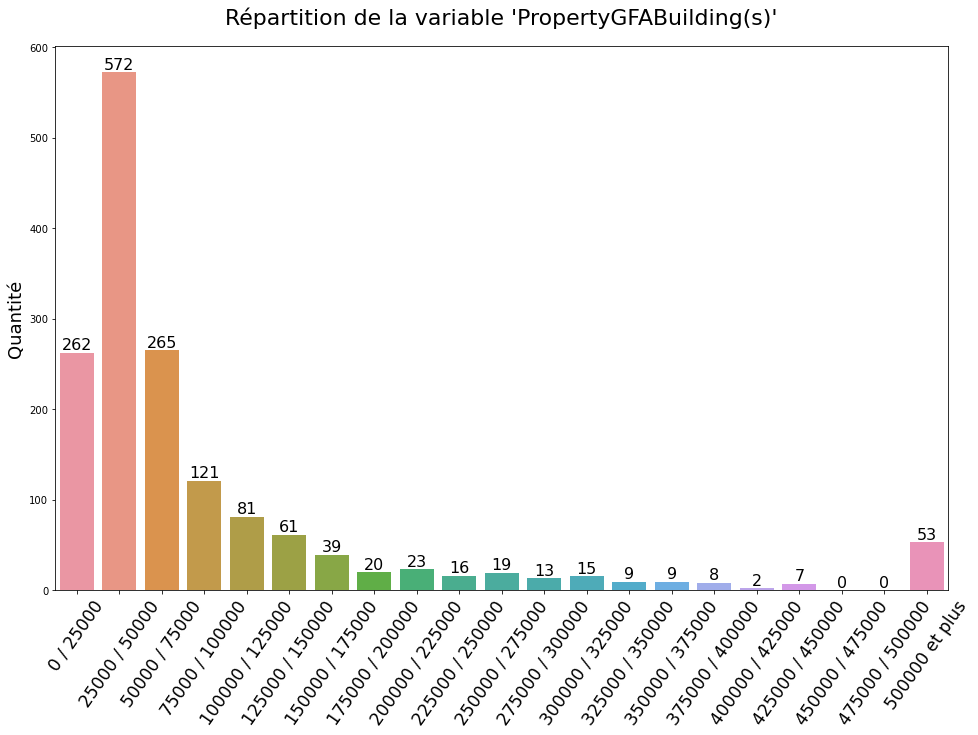

In [127]:
fig = plt.figure(figsize=(16,10))
ax = sns.barplot(x = grp.index, y = grp[0])
plt.title("Répartition de la variable 'PropertyGFABuilding(s)'", y=1.03)
plt.ylabel('Quantité')
plt.xticks(np.arange(len(labels)),  labels, rotation=55, fontsize='17')
ax.bar_label(ax.containers[0], label_type='edge', size = 16);

In [128]:
temp = data.TotalGHGEmissions.value_counts().sort_index()

idx_bins = [i for i in range(0,2000,200)]
idx_bins.append('2000 et plus')

binus = pd.DataFrame([np.zeros(11, int)], columns = idx_bins)

for energy,count in temp.items():
    for i in range (0,2000,200):
        if energy > i and energy < i+200:
            binus[i] = binus[i]+count
    binus['2000 et plus'] = sum(temp[temp.index>2000])
    
grp = binus.T
labels = ['0 / 200']

for i in range (200,2000,200):
    labels.append(str(i) + ' / ' + str(i+200))
    
labels.append('2000 et plus')

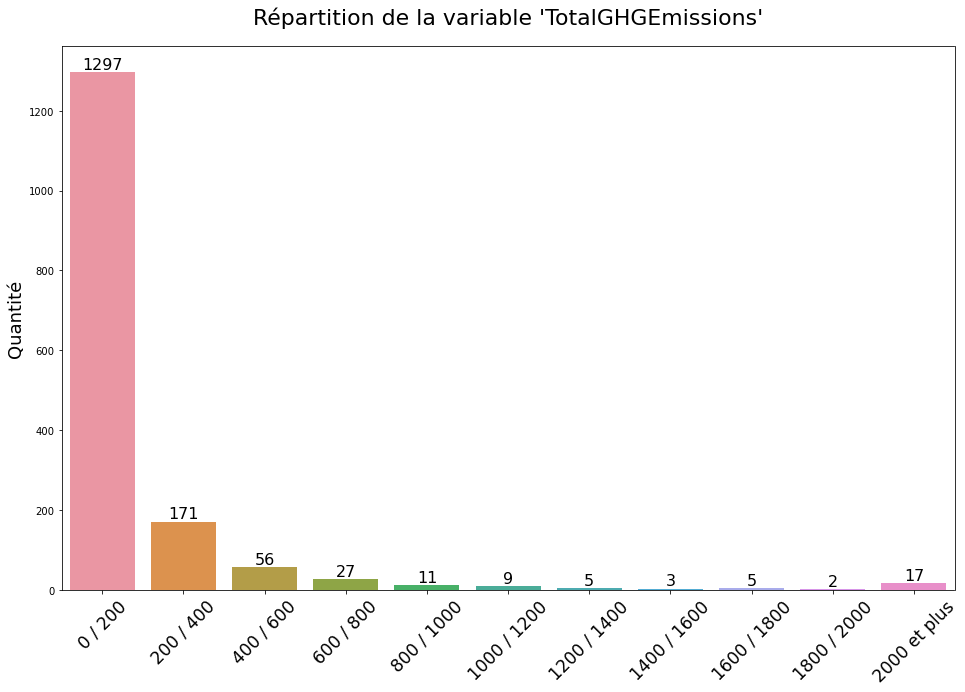

In [129]:
fig = plt.figure(figsize=(16,10))
ax = sns.barplot(x = grp.index, y = grp[0])
plt.title("Répartition de la variable 'TotalGHGEmissions'", y=1.03)
plt.ylabel('Quantité')
plt.xticks(np.arange(len(labels)),  labels, rotation=45, fontsize='17')
ax.bar_label(ax.containers[0], label_type='edge', size = 16);

In [130]:
temp = data['SiteEnergyUseWN(kBtu)'].value_counts().sort_index()

idx_bins = [i for i in range(0,20000000,2000000)]
idx_bins.append('2000 et plus')

binus = pd.DataFrame([np.zeros(11, int)], columns = idx_bins)

for energy,count in temp.items():
    for i in range (0,20000000,2000000):
        if energy > i and energy < i+2000000:
            binus[i] = binus[i]+count
    binus['2000 et plus'] = sum(temp[temp.index>20000000])
    
grp = binus.T
labels = ['0 / 2000000']

for i in range (2000000,20000000,2000000):
    labels.append(str(i) + ' / ' + str(i+2000000))
    
labels.append('20000000 et plus')

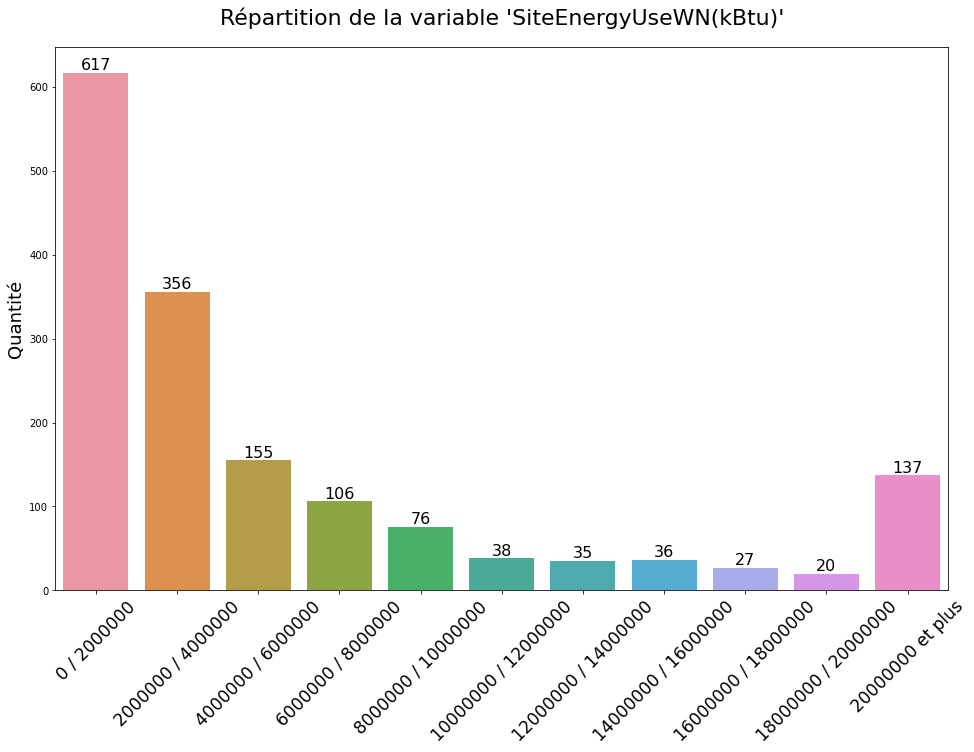

In [131]:
fig = plt.figure(figsize=(16,10))
ax = sns.barplot(x = grp.index, y = grp[0])
plt.title("Répartition de la variable 'SiteEnergyUseWN(kBtu)'", y=1.03)
plt.ylabel('Quantité')
plt.xticks(np.arange(len(labels)),  labels, rotation=45, fontsize='17')
ax.bar_label(ax.containers[0], label_type='edge', size = 16);

## <font color="#114b98" id="section_7">7. Analyse multivariée</font>

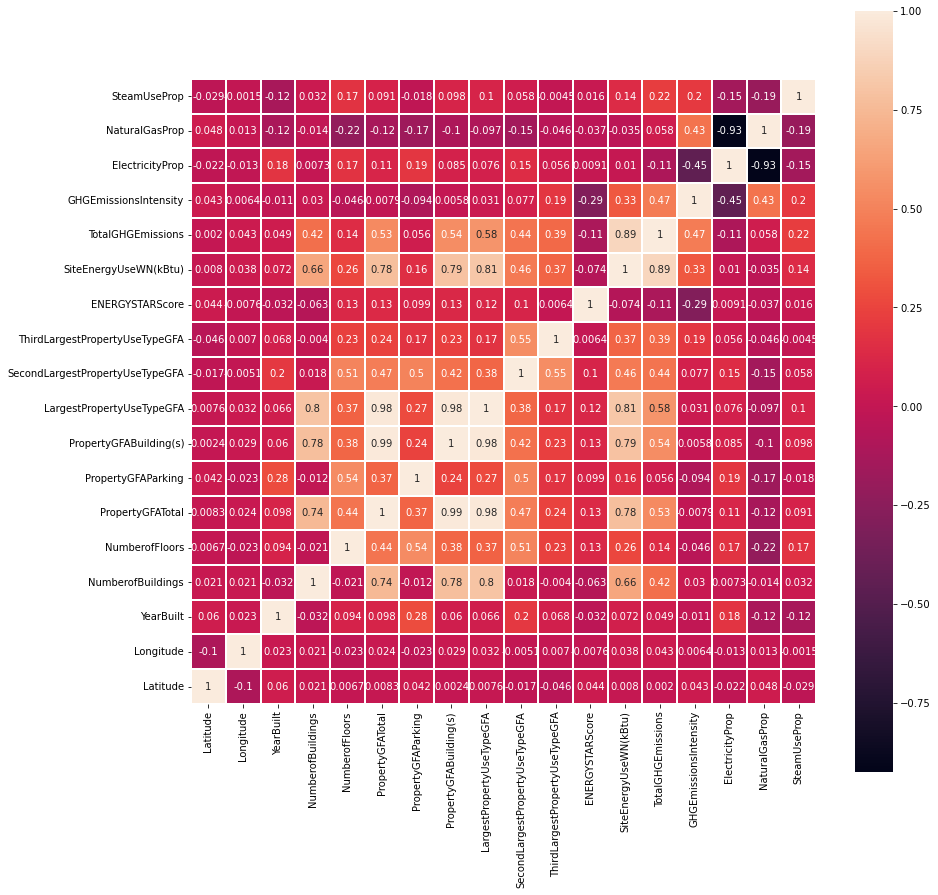

In [132]:
corr_matrix = data.corr()
fig = plt.figure(1, figsize=(14, 14))
sns.heatmap(corr_matrix, square=True, linewidths=0.1, annot=True)
plt.xlim(0, corr_matrix.shape[1])
plt.ylim(0, corr_matrix.shape[0])
plt.show()

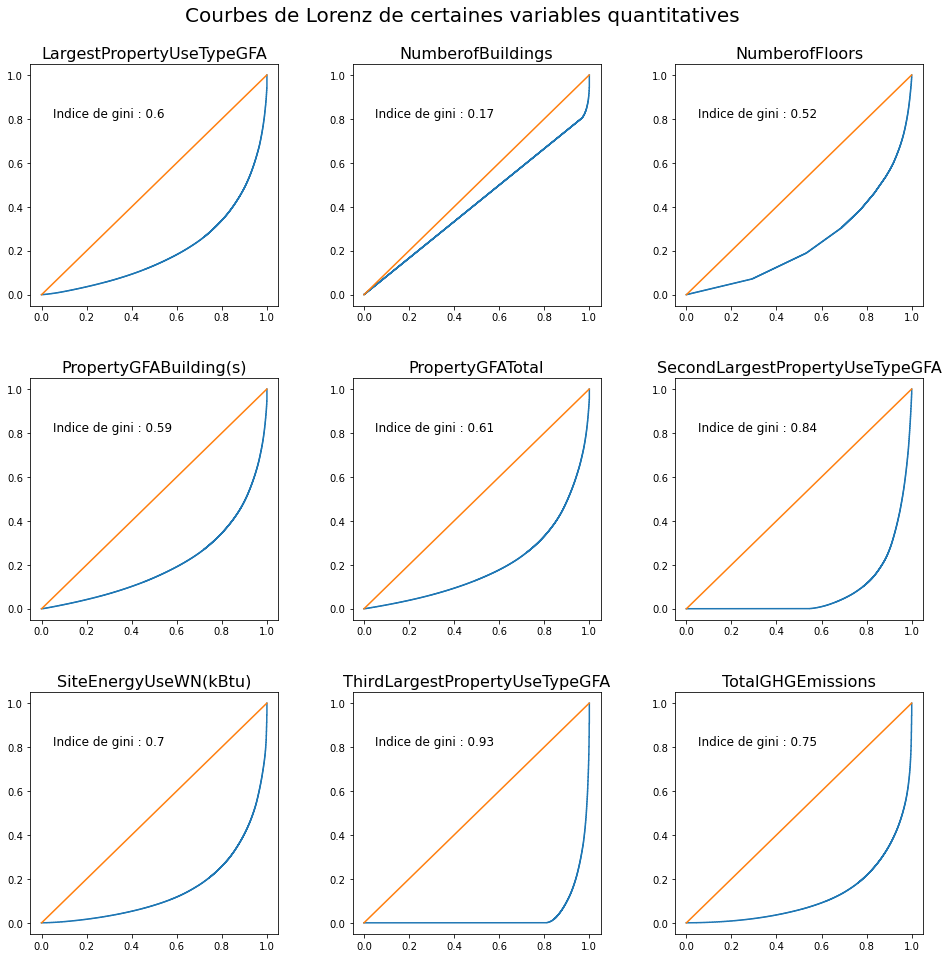

In [133]:
fig = plt.figure(figsize=(16,16))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('Courbes de Lorenz de certaines variables quantitatives', size = 20, y=0.93)
idx = 1

df_lorenz = data.copy()
df_lorenz.drop(['Latitude', 'Longitude', 'ElectricityProp', 'PropertyGFAParking', 'YearBuilt',
       'NaturalGasProp', 'SteamUseProp', 'ENERGYSTARScore'], axis = 1, inplace = True)

columns_float = df_lorenz.select_dtypes(include=['float64']).columns
columns_int = df_lorenz.select_dtypes(include=['int64']).columns

for col in columns_float.drop('GHGEmissionsIntensity').union(columns_int):      
    ax = fig.add_subplot(3, 3, idx)
    ax.set_title(str(col), size = 16)    
    dep = df_lorenz[col].values
    n = len(df_lorenz)
    lorenz = np.cumsum(np.sort(dep)) / dep.sum()
    lorenz = np.append([0],lorenz)   
    
    xaxis = np.linspace(0-1/n,1+1/n,len(lorenz))
    plt.plot(xaxis,lorenz,drawstyle='steps-post')
    plt.plot([0,1], [0,1])
    
    gini = 2 * (0.5 - (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n)
    plt.text(0.05,0.81, 'Indice de gini : ' + str(round(gini,2)), fontsize=12)

    idx = idx + 1
plt.show()

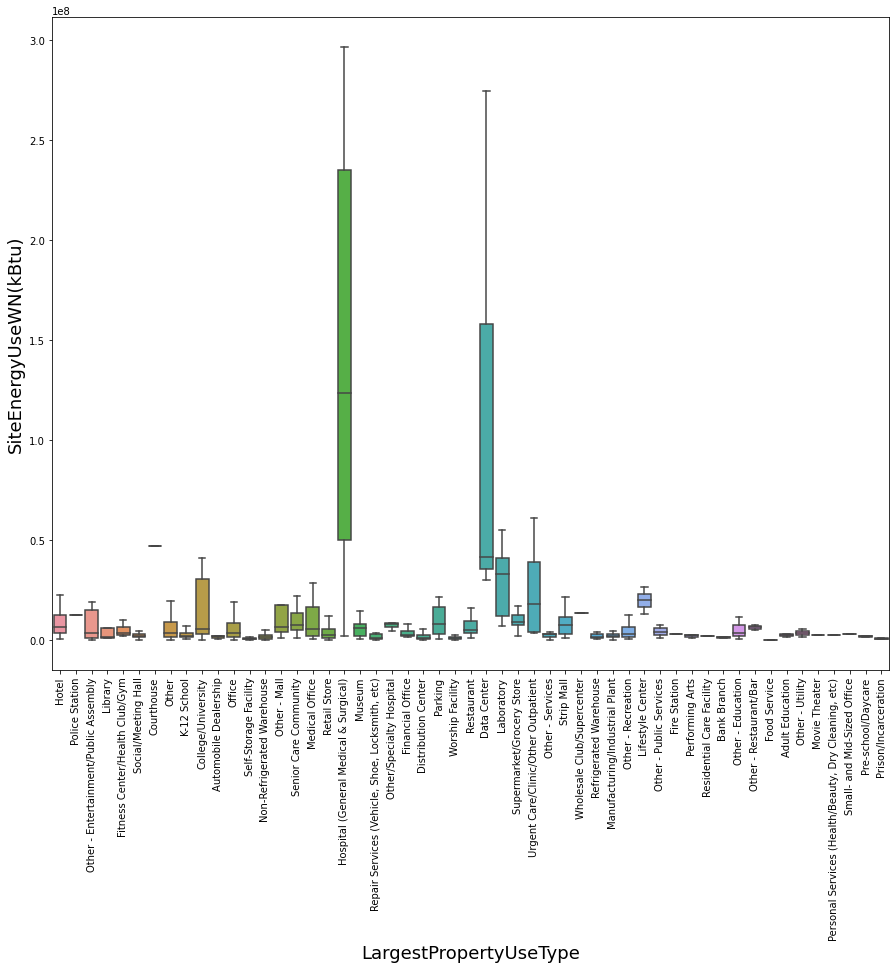

In [134]:
fig = plt.figure(1, figsize=(15,12))
sns.boxplot(data=data, x="LargestPropertyUseType" , y="SiteEnergyUseWN(kBtu)", showfliers=False)
plt.xticks(rotation=90)
plt.show()

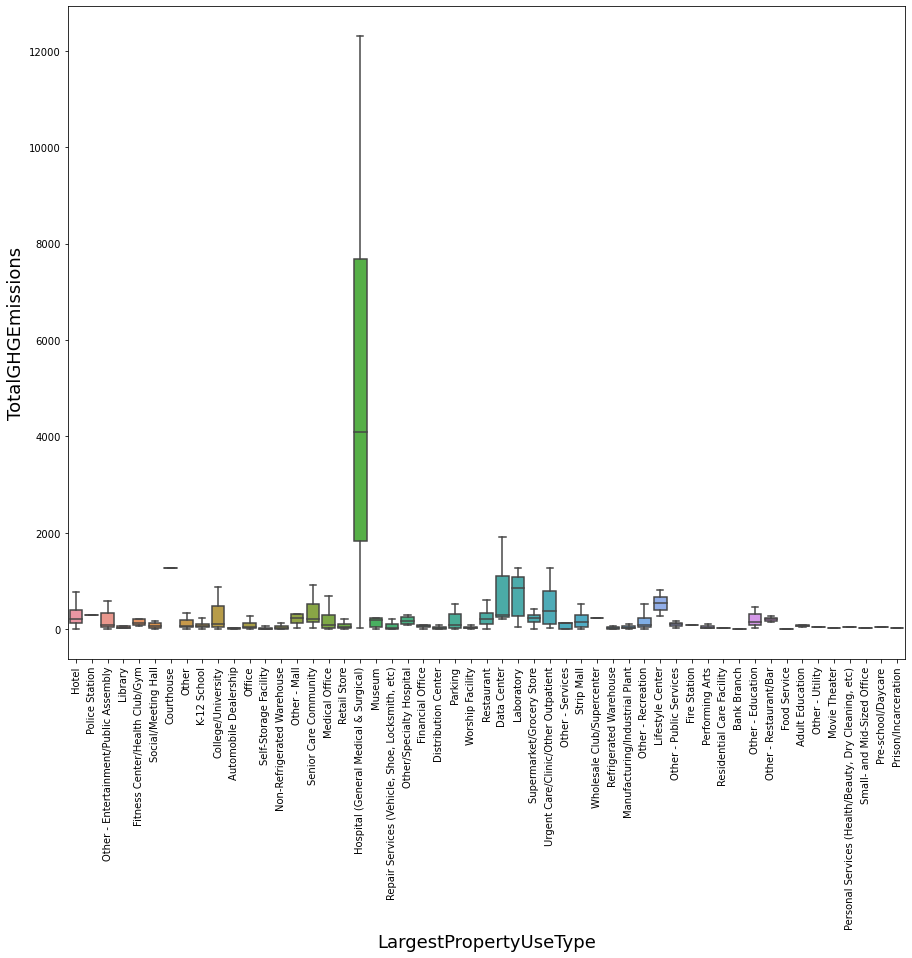

In [135]:
fig = plt.figure(1, figsize=(15,12))
sns.boxplot(data=data, x="LargestPropertyUseType" , y="TotalGHGEmissions", showfliers=False)
plt.xticks(rotation=90)
plt.show()

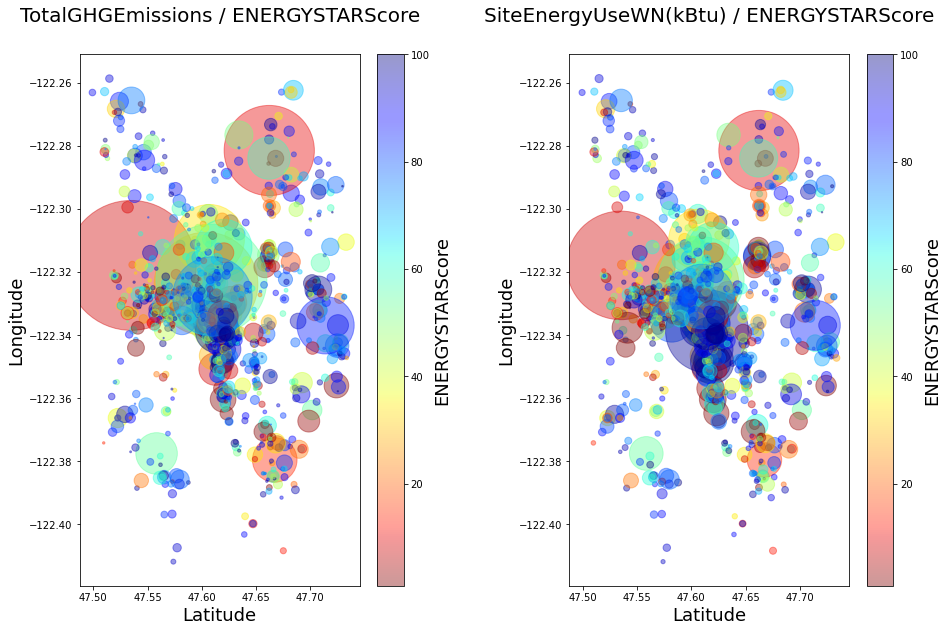

In [136]:
fig = plt.figure(1, figsize=(16, 12))

ax = fig.add_subplot(1, 2, 1)

ax.set_title("TotalGHGEmissions / ENERGYSTARScore", size=20, y=1.05)
data.plot(kind="scatter", x="Latitude", y="Longitude", alpha=0.4, ax=ax,
            s=data["TotalGHGEmissions"], c="ENERGYSTARScore", cmap=plt.get_cmap("jet_r"), colorbar=True);

fig.tight_layout(pad=12)

ax = fig.add_subplot(1, 2, 2)

ax.set_title("SiteEnergyUseWN(kBtu) / ENERGYSTARScore", size=20, y=1.05)
data.plot(kind="scatter", x="Latitude", 
          y="Longitude", alpha=0.4, ax=ax,
          s=data["SiteEnergyUseWN(kBtu)"]//40000, 
          c="ENERGYSTARScore", cmap=plt.get_cmap("jet_r"), colorbar=True);

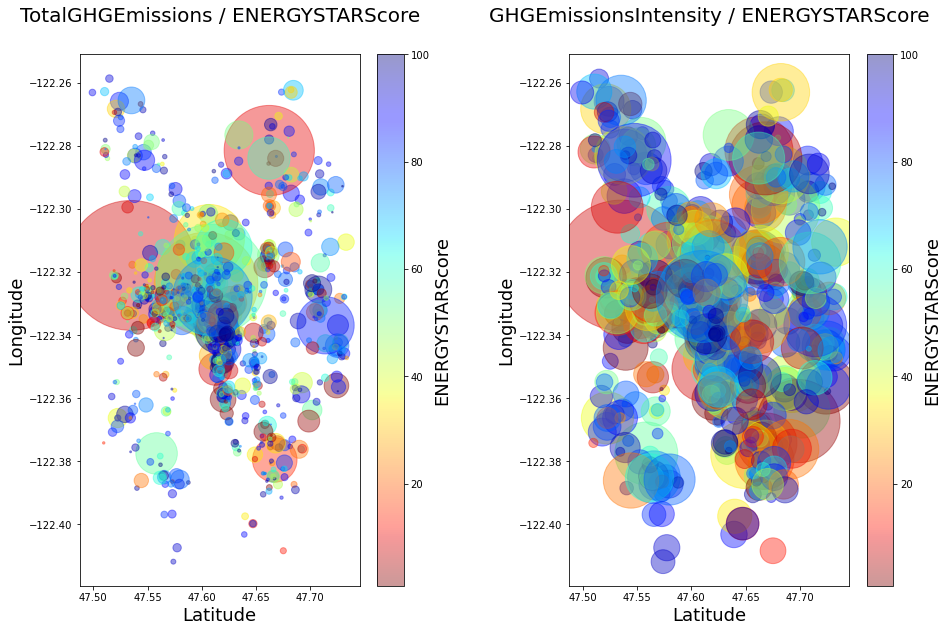

In [137]:
fig = plt.figure(1, figsize=(16, 12))

ax = fig.add_subplot(1, 2, 1)

ax.set_title("TotalGHGEmissions / ENERGYSTARScore", size=20, y=1.05)
data.plot(kind="scatter", x="Latitude", y="Longitude", alpha=0.4, ax=ax,
            s=data["TotalGHGEmissions"], c="ENERGYSTARScore", cmap=plt.get_cmap("jet_r"), colorbar=True);

fig.tight_layout(pad=12)

ax = fig.add_subplot(1, 2, 2)

ax.set_title("GHGEmissionsIntensity / ENERGYSTARScore", size=20, y=1.05)
data.plot(kind="scatter", x="Latitude", 
          y="Longitude", alpha=0.4, ax=ax,
          s=data["GHGEmissionsIntensity"]*500, 
          c="ENERGYSTARScore", cmap=plt.get_cmap("jet_r"), colorbar=True);

Je conserve 'TotalGHGEmissions' et je supprime la variable 'GHGEmissionsIntensity'.

In [138]:
data.drop(['GHGEmissionsIntensity'],
          axis = 1, 
          inplace = True)

In [139]:
down = min(data['TotalGHGEmissions'])
Q1 = data['TotalGHGEmissions'].quantile(q=0.25)
Q2 = data['TotalGHGEmissions'].median()
Q3 = data['TotalGHGEmissions'].quantile(q=0.75)
top = max(data['TotalGHGEmissions'])

m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()],zoom_start=11)
colormap = cm.StepColormap(colors=['green','yellow','orange','red'] ,
                           index=[down,Q1,Q2,Q3,top],
                           vmin=down,
                           vmax=top)

for loc, p in zip(zip(data["Latitude"],data["Longitude"]),data['TotalGHGEmissions']):
      folium.Circle(
      location=loc,
      radius=10,
      fill=True, 
      color=colormap(p)
).add_to(m)
m

In [140]:
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()],zoom_start=11)
temp=data[["Latitude","Longitude","TotalGHGEmissions"]]
heat_data = temp.groupby(["Latitude","Longitude"])["TotalGHGEmissions"].mean().reset_index().values.tolist()
folium.plugins.HeatMap(heat_data).add_to(m)
m

In [141]:
down = min(data['SiteEnergyUseWN(kBtu)'])
Q1 = data['SiteEnergyUseWN(kBtu)'].quantile(q=0.25)
Q2 = data['SiteEnergyUseWN(kBtu)'].median()
Q3 = data['SiteEnergyUseWN(kBtu)'].quantile(q=0.75)
top = max(data['SiteEnergyUseWN(kBtu)'])

m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()],zoom_start=11)
colormap = cm.StepColormap(colors=['green','yellow','orange','red'] ,
                           index=[down,Q1,Q2,Q3,top],
                           vmin=down,
                           vmax=top)

for loc, p in zip(zip(data["Latitude"],data["Longitude"]),data['SiteEnergyUseWN(kBtu)']):
      folium.Circle(
      location=loc,
      radius=5,
      fill=True, 
      color=colormap(p)
).add_to(m)
m

In [142]:
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()],zoom_start=11)
temp=data[["Latitude","Longitude","SiteEnergyUseWN(kBtu)"]]
heat_data = temp.groupby(["Latitude","Longitude"])["SiteEnergyUseWN(kBtu)"].mean().reset_index().values.tolist()
folium.plugins.HeatMap(heat_data).add_to(m)
m

## <font color="#114b98" id="section_8">8. Feature Engineering</font>

In [143]:
data.head()

BuildingType Neighborhood  Latitude  Longitude  YearBuilt  \
0  NonResidential     DOWNTOWN  47.61220 -122.33799       1927   
1  NonResidential     DOWNTOWN  47.61317 -122.33393       1996   
2  NonResidential     DOWNTOWN  47.61393 -122.33810       1969   
3  NonResidential     DOWNTOWN  47.61412 -122.33664       1926   
4  NonResidential     DOWNTOWN  47.61375 -122.34047       1980   

   NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                  1              12             88434                   0   
1                  1              11            103566               15064   
2                  1              41            956110              196718   
3                  1              10             61320                   0   
4                  1              18            175580               62000   

   PropertyGFABuilding(s) LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                   88434                  Hotel                    88434.0   
1                   88502                  Hotel                    83880.0   
2                  759392                  Hotel                   756493.0   
3                   61320                  Hotel                    61320.0   
4                  113580                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0               No information                              0.0   
1                      Parking                          15064.0   
2               No information                              0.0   
3               No information                              0.0   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0              No information                             0.0   
1                  Restaurant                          4622.0   
2              No information                             0.0   
3              No information                             0.0   
4               Swimming Pool                             0.0   

   ENERGYSTARScore  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  ElectricityProp  \
0             60.0              7456910.0             249.98         0.529177   
1             61.0              8664479.0             295.86         0.374270   
2             43.0             73937112.0            2089.28         0.669849   
3             56.0              6946800.5             286.43         0.398590   
4             75.0             14656503.0             505.01         0.366295   

   NaturalGasProp  SteamUseProp  
0        0.171177      0.268728  
1        0.593813      0.000000  
2        0.020204      0.291688  
3        0.260726      0.318772  
4        0.600689      0.000000

Je crée une nouvelle variable 'BuildingAge' à l'aide de la variable 'YearBuilt'.

In [144]:
data['BuildingAge'] = data['YearBuilt'].max() - data['YearBuilt']
data = data.drop(['YearBuilt'], axis=1)

Je passe au log pour les variables 'NumberofFloors et 'NumberofBuildings'.

In [145]:
data['NumberofFloors'] = data['NumberofFloors'].apply(lambda x : np.log(1 + x))

In [146]:
data['NumberofBuildings'] = data['NumberofBuildings'].apply(lambda x : np.log(1 + x))

Mes modèles fonctionne mieux en supprimant la variable 'NumberofBuildings'.

In [147]:
data = data.drop(['NumberofBuildings'], axis=1)

Je passe au log les variables d'énergie et de CO2.

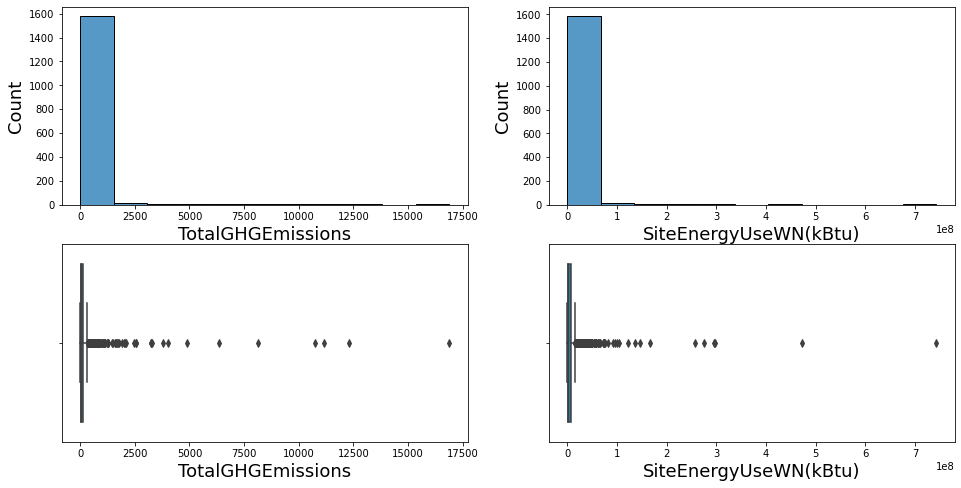

In [148]:
fig = plt.figure(1, figsize=(16, 8))
for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUseWN(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.histplot(data = data, x=label, bins=int(1 + np.log2(len(data))))
    plt.subplot(2,2,i+3)
    sns.boxplot(data = data, x=label)
plt.show()

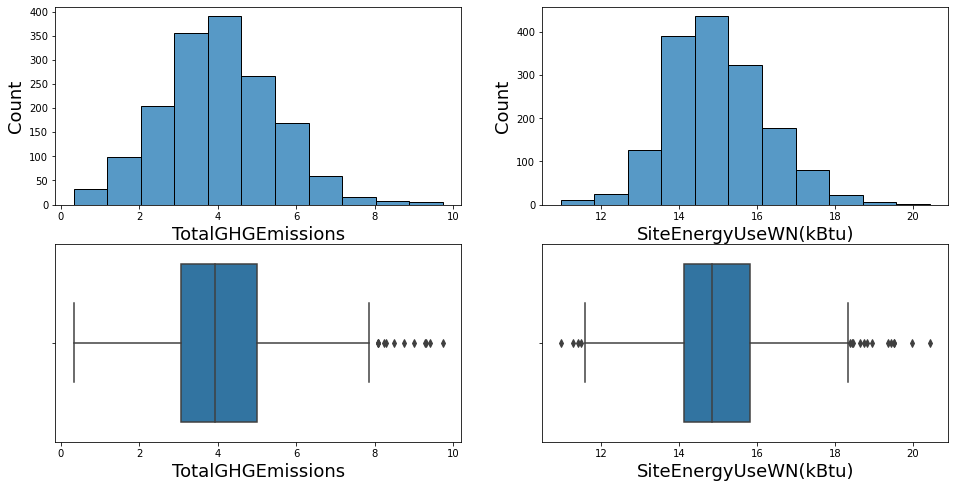

In [149]:
fig = plt.figure(1, figsize=(16, 8))
for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUseWN(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.histplot(data = data, x=data[label].apply(lambda x : np.log(1 + x)), bins=int(1 + np.log2(len(data))))
    plt.subplot(2,2,i+3)
    sns.boxplot(data = data, x=data[label].apply(lambda x : np.log(1 + x)))
plt.show()

In [150]:
data['TotalGHGEmissions'] = data['TotalGHGEmissions'].apply(lambda x : np.log(1 + x))
data['SiteEnergyUseWN(kBtu)'] = data['SiteEnergyUseWN(kBtu)'].apply(lambda x : np.log(1 + x))

Je garde les latitudes et longitudes et je supprime les 'Neighborhood' après avoir testé lors des CV sur les différents modèles.

In [151]:
data.drop('Neighborhood', inplace=True, axis=1)

Je décide de standardiser les valeurs de 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA' et 'PropertyGFAParking' à l'aide de la variable 'PropertyGFATotal'.

On a les relations suivantes :
 - Parking + Building = Total
 - First + Second + Third = Building
 
Donc :
 - First + Second + Third + Parking = Total

In [152]:
data = data.drop(['PropertyGFABuilding(s)'], axis=1)

data['LargestPropertyUseTypeGFA'] = data['LargestPropertyUseTypeGFA']/data['PropertyGFATotal']
data['SecondLargestPropertyUseTypeGFA'] = data['SecondLargestPropertyUseTypeGFA']/data['PropertyGFATotal']
data['ThirdLargestPropertyUseTypeGFA'] = data['ThirdLargestPropertyUseTypeGFA']/data['PropertyGFATotal']
data['PropertyGFAParking'] = data['PropertyGFAParking']/data['PropertyGFATotal']

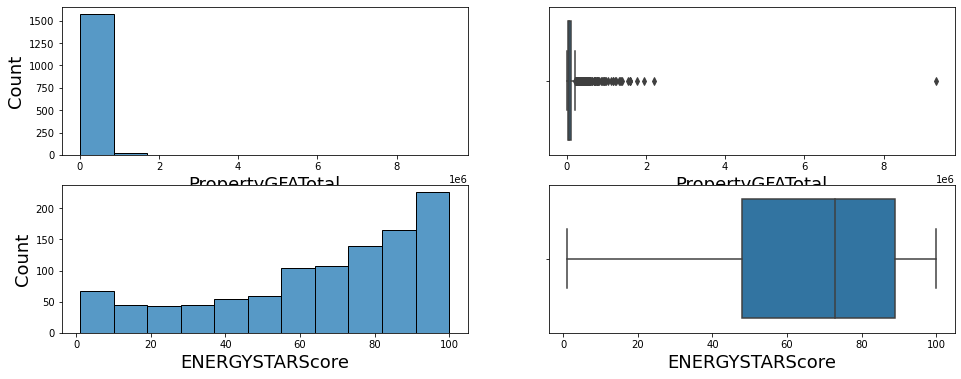

In [153]:
fig = plt.figure(1, figsize=(16, 6))
for i,label in zip((0,2),['PropertyGFATotal','ENERGYSTARScore']) :
    plt.subplot(2,2,i+1)
    sns.histplot(data = data, x=label, bins=int(1 + np.log2(len(data))))
    plt.subplot(2,2,i+2)
    sns.boxplot(data = data, x=label)
plt.show()

In [154]:
data['PropertyGFATotal'] = data['PropertyGFATotal'].apply(lambda x : np.log(1 + x))

Je réalise un encodage des surfaces normalisées par les différents types de propriétés.

In [155]:
data.head()

BuildingType  Latitude  Longitude  NumberofFloors  PropertyGFATotal  \
0  NonResidential  47.61220 -122.33799        2.564949         11.390023   
1  NonResidential  47.61317 -122.33393        2.484907         11.547974   
2  NonResidential  47.61393 -122.33810        3.737670         13.770629   
3  NonResidential  47.61412 -122.33664        2.397895         11.023878   
4  NonResidential  47.61375 -122.34047        2.944439         12.075856   

   PropertyGFAParking LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0            0.000000                  Hotel                   1.000000   
1            0.145453                  Hotel                   0.809918   
2            0.205748                  Hotel                   0.791220   
3            0.000000                  Hotel                   1.000000   
4            0.353115                  Hotel                   0.703070   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0               No information                         0.000000   
1                      Parking                         0.145453   
2               No information                         0.000000   
3               No information                         0.000000   
4                      Parking                         0.387339   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0              No information                        0.000000   
1                  Restaurant                        0.044629   
2              No information                        0.000000   
3              No information                        0.000000   
4               Swimming Pool                        0.000000   

   ENERGYSTARScore  SiteEnergyUseWN(kBtu)  TotalGHGEmissions  ElectricityProp  \
0             60.0              15.824652           5.525373         0.529177   
1             61.0              15.974742           5.693261         0.374270   
2             43.0              18.118725           7.645053         0.669849   
3             56.0              15.753792           5.660979         0.398590   
4             75.0              16.500395           6.226556         0.366295   

   NaturalGasProp  SteamUseProp  BuildingAge  
0        0.171177      0.268728           88  
1        0.593813      0.000000           19  
2        0.020204      0.291688           46  
3        0.260726      0.318772           89  
4        0.600689      0.000000           35

In [156]:
categories_first = pd.DataFrame(columns = data['LargestPropertyUseType'].unique())
for idx, cat in data['LargestPropertyUseType'].items():
    categories_first.loc[idx,cat] = data['LargestPropertyUseTypeGFA'][idx]
categories_first.fillna(0, inplace=True)

In [157]:
categories_second = pd.DataFrame(columns = data['SecondLargestPropertyUseType'].unique())
for idx, cat in data['SecondLargestPropertyUseType'].items():
    categories_second.loc[idx,cat] = data['SecondLargestPropertyUseTypeGFA'][idx]
categories_second.fillna(0, inplace=True)

In [158]:
categories_third = pd.DataFrame(columns = data['ThirdLargestPropertyUseType'].unique())
for idx, cat in data['ThirdLargestPropertyUseType'].items():
    categories_third.loc[idx,cat] = data['ThirdLargestPropertyUseTypeGFA'][idx]
categories_third.fillna(0, inplace=True)

In [159]:
categories = categories_first + categories_second + categories_third
categories.fillna(0, inplace=True)
categories.head()

Adult Education  Automobile Dealership  Bank Branch  Bar/Nightclub  \
0              0.0                    0.0          0.0            0.0   
1              0.0                    0.0          0.0            0.0   
2              0.0                    0.0          0.0            0.0   
3              0.0                    0.0          0.0            0.0   
4              0.0                    0.0          0.0            0.0   

   College/University  Convenience Store without Gas Station  Courthouse  \
0                 0.0                                    0.0         0.0   
1                 0.0                                    0.0         0.0   
2                 0.0                                    0.0         0.0   
3                 0.0                                    0.0         0.0   
4                 0.0                                    0.0         0.0   

   Data Center  Distribution Center  Enclosed Mall  Fast Food Restaurant  \
0          0.0                  0.0            0.0                   0.0   
1          0.0                  0.0            0.0                   0.0   
2          0.0                  0.0            0.0                   0.0   
3          0.0                  0.0            0.0                   0.0   
4          0.0                  0.0            0.0                   0.0   

   Financial Office  Fire Station  Fitness Center/Health Club/Gym  Food Sales  \
0               0.0           0.0                             0.0         0.0   
1               0.0           0.0                             0.0         0.0   
2               0.0           0.0                             0.0         0.0   
3               0.0           0.0                             0.0         0.0   
4               0.0           0.0                             0.0         0.0   

   Food Service  Hospital (General Medical & Surgical)     Hotel  K-12 School  \
0           0.0                                    0.0  1.000000          0.0   
1           0.0                                    0.0  0.809918          0.0   
2           0.0                                    0.0  0.791220          0.0   
3           0.0                                    0.0  1.000000          0.0   
4           0.0                                    0.0  0.703070          0.0   

   Laboratory  Library  Lifestyle Center  Manufacturing/Industrial Plant  ...  \
0         0.0      0.0               0.0                             0.0  ...   
1         0.0      0.0               0.0                             0.0  ...   
2         0.0      0.0               0.0                             0.0  ...   
3         0.0      0.0               0.0                             0.0  ...   
4         0.0      0.0               0.0                             0.0  ...   

    Parking  Performing Arts  \
0  0.000000              0.0   
1  0.145453              0.0   
2  0.000000              0.0   
3  0.000000              0.0   
4  0.387339              0.0   

   Personal Services (Health/Beauty, Dry Cleaning, etc)  Police Station  \
0                                                0.0                0.0   
1                                                0.0                0.0   
2                                                0.0                0.0   
3                                                0.0                0.0   
4                                                0.0                0.0   

   Pre-school/Daycare  Prison/Incarceration  Refrigerated Warehouse  \
0                 0.0                   0.0                     0.0   
1                 0.0                   0.0                     0.0   
2                 0.0                   0.0                     0.0   
3                 0.0                   0.0                     0.0   
4                 0.0                   0.0                     0.0   

   Repair Services (Vehicle, Shoe, Locksmith, etc)  Residence Hall/Dormitory  \
0                                     

In [160]:
data = data.drop(['LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
                  'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
                  'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA'], 
                 axis=1)

In [161]:
data_prepared = pd.concat([data, categories], axis=1)

In [162]:
data_prepared.reset_index(inplace = True, drop = True)

In [163]:
data_prepared.shape

(1603, 78)

In [164]:
data_prepared.describe()

Latitude    Longitude  NumberofFloors  PropertyGFATotal  \
count  1603.000000  1603.000000     1603.000000       1603.000000   
mean     47.615590  -122.333197        1.336859         11.052655   
std       0.048477     0.024717        0.645325          0.959423   
min      47.499170  -122.411820        0.693147          9.331318   
25%      47.584370  -122.343455        0.693147         10.296408   
50%      47.612290  -122.333040        1.098612         10.818798   
75%      47.649045  -122.322110        1.609438         11.571397   
max      47.733870  -122.258640        4.343805         16.047690   

       PropertyGFAParking  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
count         1603.000000      1056.000000            1603.000000   
mean             0.061633        65.135417              14.991104   
std              0.140811        28.398646               1.278184   
min              0.000000         1.000000              10.970183   
25%              0.000000        48.000000              14.122921   
50%              0.000000        73.000000              14.840351   
75%              0.000000        89.000000              15.811399   
max              0.895023       100.000000              20.424940   

       TotalGHGEmissions  ElectricityProp  NaturalGasProp  SteamUseProp  \
count        1603.000000      1603.000000     1603.000000   1603.000000   
mean            4.023892         0.672073        0.257945      0.020128   
std             1.436207         0.270466        0.241404      0.085826   
min             0.336472         0.000000        0.000000      0.000000   
25%             3.075005         0.455077        0.000000      0.000000   
50%             3.931433         0.669849        0.232367      0.000000   
75%             4.994741         0.951813        0.460303      0.000000   
max             9.733410         1.038722        1.000000      0.647731   

       BuildingAge  Adult Education  Automobile Dealership  Bank Branch  \
count  1603.000000           1603.0                 1603.0  1603.000000   
mean     52.953837              0.0                    0.0     0.002791   
std      32.424199              0.0                    0.0     0.039724   
min       0.000000              0.0                    0.0     0.000000   
25%      26.000000              0.0                    0.0     0.000000   
50%      50.000000              0.0                    0.0     0.000000   
75%      85.000000              0.0                    0.0     0.000000   
max     115.000000              0.0                    0.0     0.896219   

       Bar/Nightclub  College/University  \
count         1603.0              1603.0   
mean             0.0                 0.0   
std              0.0                 0.0   
min              0.0                 0.0   
25%              0.0                 0.0   
50%              0.0                 0.0   
75%              0.0                 0.0   
max              0.0                 0.0   

       Convenience Store without Gas Station  Courthouse  Data Center  \
count                                 1603.0      1603.0  1603.000000   
mean                                     0.0         0.0     0.002335   
std                                      0.0         0.0     0.035191   
min                                      0.0         0.0     0.000000   
25%                                      0.0         0.0     0.000000   
50%                                      0.0         0.0     0.000000   
75%                                      0.0         0.0     0.000000   
max                                      0.0         0.0     1.000000   

       Distribution Center  Enclosed Mall  Fast Food Restaurant  ...  \
count          1603.000000         1603.0                1603.0  ...   
mean              0.033588            0.0                   0.0  ...   
std               0.191085            0.0                   0.0  ...   
min               0.000000            0.0                   0.0  ...   

In [165]:
data_prepared = data_prepared.drop(['No information','BuildingType'], axis=1)

In [166]:
data_prepared = data_prepared.drop(['Latitude','Longitude'], axis=1)

In [167]:
data_prepared.head(10)

NumberofFloors  PropertyGFATotal  PropertyGFAParking  ENERGYSTARScore  \
0        2.564949         11.390023            0.000000             60.0   
1        2.484907         11.547974            0.145453             61.0   
2        3.737670         13.770629            0.205748             43.0   
3        2.397895         11.023878            0.000000             56.0   
4        2.944439         12.075856            0.353115             75.0   
5        1.098612         11.485441            0.382349              NaN   
6        2.484907         11.326704            0.000000             27.0   
7        2.197225         11.540171            0.000000              NaN   
8        2.772589         12.007530            0.000000             43.0   
9        2.484907         11.939265            0.125872             30.0   

   SiteEnergyUseWN(kBtu)  TotalGHGEmissions  ElectricityProp  NaturalGasProp  \
0              15.824652           5.525373         0.529177        0.171177   
1              15.974742           5.693261         0.374270        0.593813   
2              18.118725           7.645053         0.669849        0.020204   
3              15.753792           5.660979         0.398590        0.260726   
4              16.500395           6.226556         0.366295        0.600689   
5              16.347755           5.713106         0.585885        0.374765   
6              15.617677           5.176940         0.463685        0.486177   
7              15.771071           5.404972         0.514533        0.054499   
8              16.468334           5.974217         0.514153        0.452718   
9              16.627736           6.539962         0.371698        0.275838   

   SteamUseProp  BuildingAge  Adult Education  Automobile Dealership  \
0      0.268728           88              0.0                    0.0   
1      0.000000           19              0.0                    0.0   
2      0.291688           46              0.0                    0.0   
3      0.318772           89              0.0                    0.0   
4      0.000000           35              0.0                    0.0   
5      0.000000           16              0.0                    0.0   
6      0.000000           89              0.0                    0.0   
7      0.322061           89              0.0                    0.0   
8      0.000000          111              0.0                    0.0   
9      0.314602           46              0.0                    0.0   

   Bank Branch  Bar/Nightclub  College/University  \
0          0.0            0.0                 0.0   
1          0.0            0.0                 0.0   
2          0.0            0.0                 0.0   
3          0.0            0.0                 0.0   
4          0.0            0.0                 0.0   
5          0.0            0.0                 0.0   
6          0.0            0.0                 0.0   
7          0.0            0.0                 0.0   
8          0.0            0.0                 0.0   
9          0.0            0.0                 0.0   

   Convenience Store without Gas Station  Courthouse  Data Center  \
0                                    0.0         0.0          0.0   
1                                    0.0         0.0          0.0   
2                                    0.0         0.0          0.0   
3                                    0.0         0.0          0.0   
4                                    0.0         0.0          0.0   
5                                    0.0         0.0          0.0   
6                                    0.0         0.0          0.0   
7                                    0.0         0.0          0.0   
8                                    0.0         0.0          0.0   
9                                    0.0         0.0          0.0   

   Distribution Center  Enclosed Mall  Fast Food Restaurant  Financial Office  \
0                  0.0            0.0                   0.0        

In [168]:
data_prepared.to_csv(path+'data_seattle_clean.csv', index=False)